<a href="https://colab.research.google.com/github/KIET-NEST-PROJECTS-KBH/E-4F-403/blob/main/GDP_ANALYSIS_USING_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# these above libraries are used for data visualisation.

Upload data, had a quick look and didn't like the "GDP..." column name, so I change it.

In [17]:
df_raw = pd.read_csv('/content/sample_data/.ipynb_checkpoints/World GDP Dataset.csv')
df = df_raw.copy()
df = df.rename(columns={df_raw.columns[0]: 'Country'})
df = df.set_index(['Country'])

# Have a look at the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, Afghanistan to ©IMF, 2022
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1980    196 non-null    float64
 1   1981    196 non-null    float64
 2   1982    196 non-null    float64
 3   1983    196 non-null    float64
 4   1984    196 non-null    float64
 5   1985    196 non-null    float64
 6   1986    196 non-null    float64
 7   1987    196 non-null    float64
 8   1988    196 non-null    float64
 9   1989    196 non-null    float64
 10  1990    196 non-null    float64
 11  1991    196 non-null    float64
 12  1992    196 non-null    float64
 13  1993    196 non-null    float64
 14  1994    196 non-null    float64
 15  1995    196 non-null    float64
 16  1996    196 non-null    float64
 17  1997    196 non-null    float64
 18  1998    196 non-null    float64
 19  1999    196 non-null    float64
 20  2000    196 non-null    float64
 21  2001    196 non-null    flo

In [19]:
df.describe()

1980         1981         1982         1983         1984  \
count   196.000000   196.000000   196.000000   196.000000   196.000000   
mean     57.338077    58.664699    57.584796    59.127786    61.232923   
std     240.113017   260.659304   265.846074   286.386716   313.352366   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.631000     2.754500     2.754500     2.910000     2.911000   
75%      25.375500    25.908750    24.914500    24.994750    23.249500   
max    2857.325000  3207.025000  3343.800000  3634.025000  4037.650000   

              1985         1986         1987         1988         1989  ...  \
count   196.000000   196.000000   196.000000   196.000000   196.000000  ...   
mean     63.933893    75.388209    86.801087    97.609214   102.692837  ...   
std     335.589357   375.354862   413.917627   459.752473   484.438418  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.024000     0.075250     0.082500     0.086250     0.103500  ...   
50%       3.108500     3.074500     2.991500     3.234000     3.412500  ...   
75%      21.782500    27.673750    32.787750    32.983250    38.040000  ...   
max    4339.000000  4579.625000  4855.250000  5236.425000  5641.600000  ...   

               2014          2015          2016          2017          2018  \
count    196.000000    196.000000    196.000000    196.000000    196.000000   
mean     405.250082    382.369679    388.832944    413.449760    439.845041   
std     1572.575493   1602.925694   1642.988598   1731.343695   1855.248794   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.453250      7.824250      6.948750      7.661000      8.173750   
50%       34.649500     32.727000     33.020000     35.780000     37.373500   
75%      216.505750    189.031000    193.687000    212.692250    230.460250   
max    17550.675000  18206.025000  18695.100000  19479.625000  20527.150000   

               2019          2020          2021          2022          2023  
count    196.000000    196.000000    196.000000    196.000000    196.000000  
mean     447.216026    435.921781    495.222102    518.159561    539.373740  
std     1920.720806   1907.553151   2153.339784   2284.284731   2392.051388  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        8.729250      8.492500      8.694000      9.623000      9.004750  
50%       37.983000     34.068000     38.018000     39.821000     40.484500  
75%      235.255000    214.971500    247.744250    262.243250    255.611000  
max    21372.600000  20893.750000  22996.075000  25035.164000  26185.210000  

[8 rows x 44 columns]

As 230 entries, only 196 valid, we just remove all NaN

In [20]:
df = df.dropna(how='all')

In [21]:
df.head()

1980    1981    1982    1983    1984    1985    1986    1987  \
Country                                                                       
Afghanistan   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
Albania       1.946   2.229   2.296   2.319   2.290   2.339   2.587   2.566   
Algeria      42.346  44.372  44.780  47.529  51.513  61.132  61.535  63.300   
Andorra       0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
Angola        6.639   6.214   6.214   6.476   6.864   8.457   7.918   9.050   

               1988    1989  ...     2014     2015     2016     2017     2018  \
Country                      ...                                                
Afghanistan   0.000   0.000  ...   20.616   20.057   18.020   18.883   18.401   
Albania       2.530   2.779  ...   13.246   11.389   11.862   13.053   15.157   
Algeria      51.664  52.558  ...  213.810  165.979  160.034  170.207  175.372   
Andorra       0.000   0.000  ...    3.267    2.789    2.895    2.993    3.217   
Angola        9.818  11.421  ...  145.712  116.194  101.124  122.022  101.353   

                2019     2020     2021     2022     2023  
Country                                                   
Afghanistan   18.876   20.136    0.000    0.000    0.000  
Albania       15.399   15.161   18.310   18.256   18.842  
Algeria      171.680  144.922  162.711  187.155  190.254  
Andorra        3.155    2.885    3.330    3.302    3.360  
Angola        84.516   58.125   75.179  124.794  135.558  

[5 rows x 44 columns]

A couple of lists that we can use later

In [22]:
countries = list(df.index.unique())
print(countries)
years = list(df.columns)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', "China, People's Republic of", 'Colombia', 'Comoros', 'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR', 'Hung

And the usual function for charts

In [23]:
def graficos(df, lista_seleccion, ancho=20,  alto=10, columna_y = '', title='', print_legend='Y'):

    # purpose is to define a function that can plot multiple charts
    # as most likely will be time series, we use the column for x axis
    # and multiple indexes in seleccion

    # Create the chart
    fig, ax = plt.subplots(figsize=(ancho, alto))

    # Set the title
    ax.set_title(title, fontsize=30)

    # Set the background color, never plain white
    ax.set_facecolor('#F7FAFC')
    # And add colors, preferibly non-saturated
    colores = ['navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
               'forestgreen', 'steelblue', 'deeppink', 'darkorange', 'lightgreen', 'gold',
               'darkviolet', 'tan', 'indianred', 'darkturquoise', 'darkslategrey', 'magenta',
               'peru', 'turquoise',
              ]

    # We will use listas to plot multiple data in one chart, for comparable reasons
    # j is simply for color coding
    listas, j, leyenda = [], 0, []

    for seleccion in lista_seleccion:
        x1 = df.columns
        y1 = df.loc[seleccion]
        listas.append(((x1, y1), colores[j])) # Creating a listas item to be shown in the plot.
        leyenda.append(seleccion)
        # Start over if we have more series than color.
        if j == len(colores)-1:
            j=0
        else:
            j+=1

    # Just plot the series.
    for lista in listas:
        ax.plot(*lista[0], color=lista[1])

    # And all features in the chart.
    if print_legend == 'Y':
        plt.legend(leyenda, loc='upper left', bbox_to_anchor=(0, 1))
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xticks(ax.get_xticks()[::2])
    for label in ax.get_xticklabels():
        label.set(rotation=30)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel(columna_y, fontsize=15)
    plt.show()

# Some Viz

So, just for fun, let's see GDP per year for countries ending with an "n"

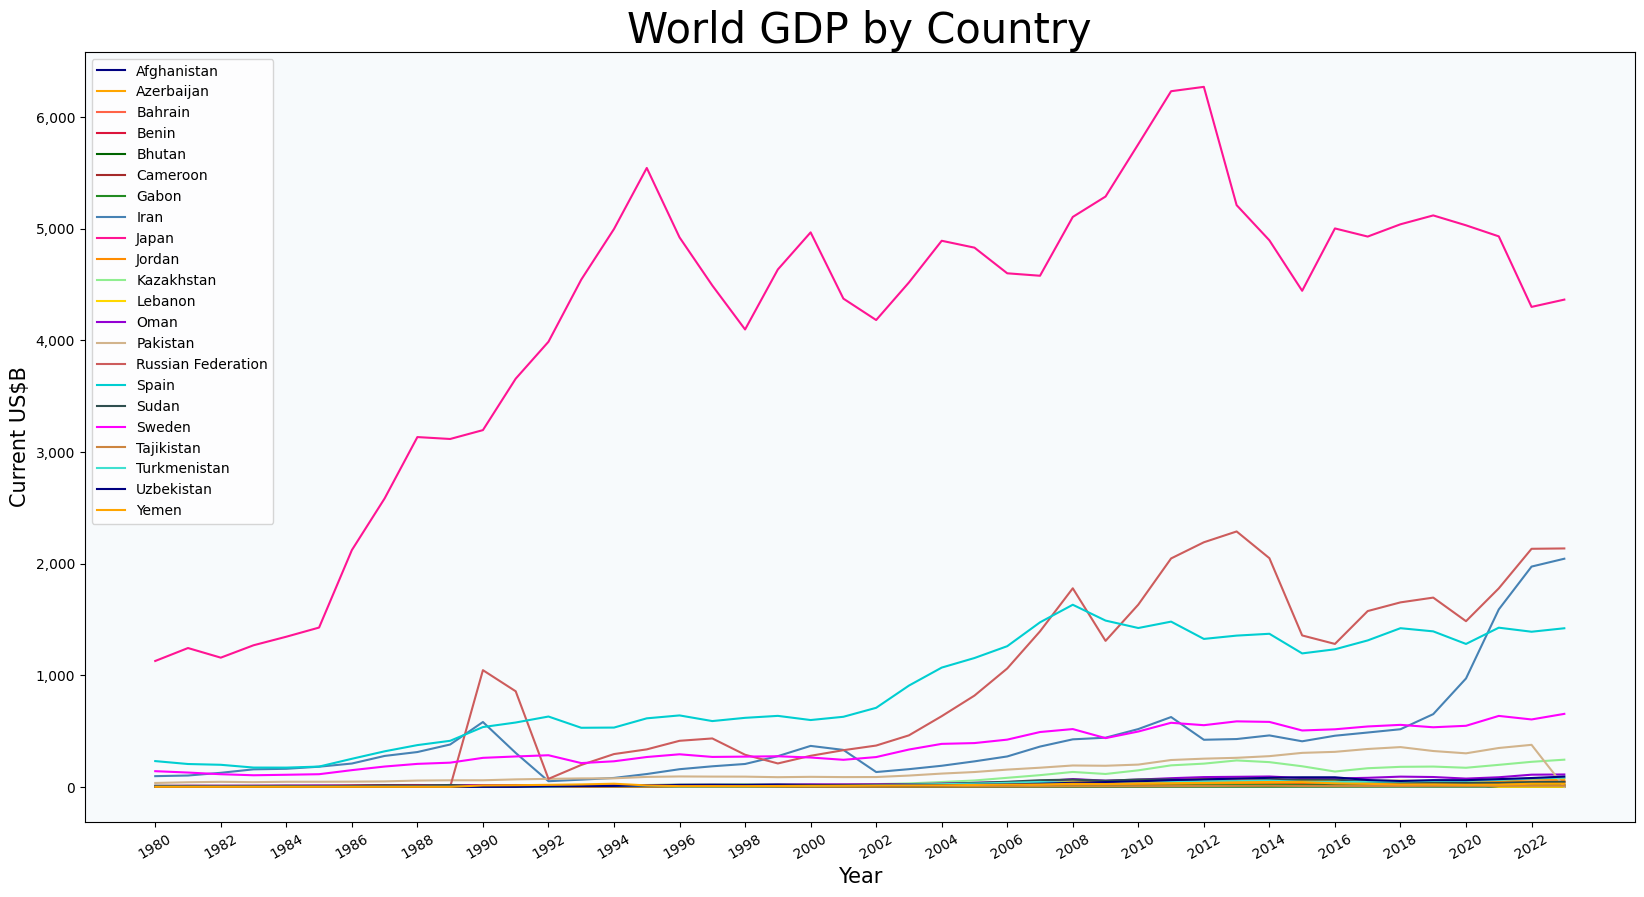

In [24]:
# @title Default title text
lista = [pais for pais in countries if pais[-1]=='n']
graficos(df, lista,
         ancho=20, alto=10,
         columna_y='Current US$B',
         title='World GDP by Country', print_legend='Y')

Now countries with GDP in 2021 higher than $1T

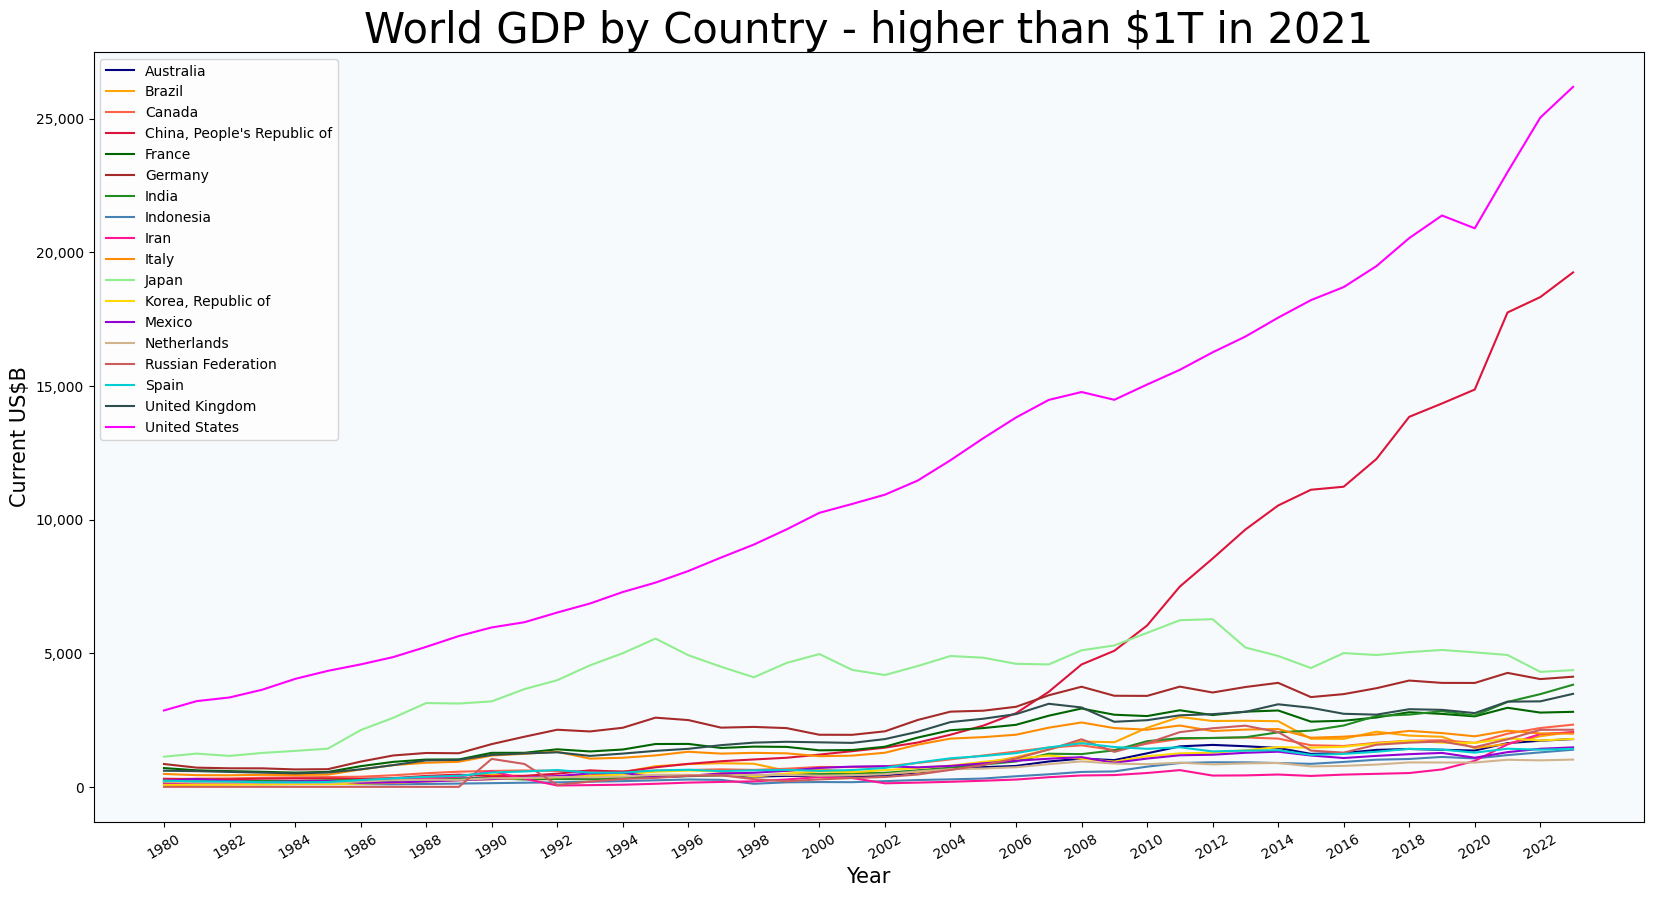

In [25]:
dfs = df[df['2021']>1000]
lista = list(dfs.index)
graficos(dfs, lista,
         ancho=20, alto=10,
         columna_y='Current US$B',
         title='World GDP by Country - higher than $1T in 2021', print_legend='Y')

To add more visibility, let's remove the top countries, USA and China.

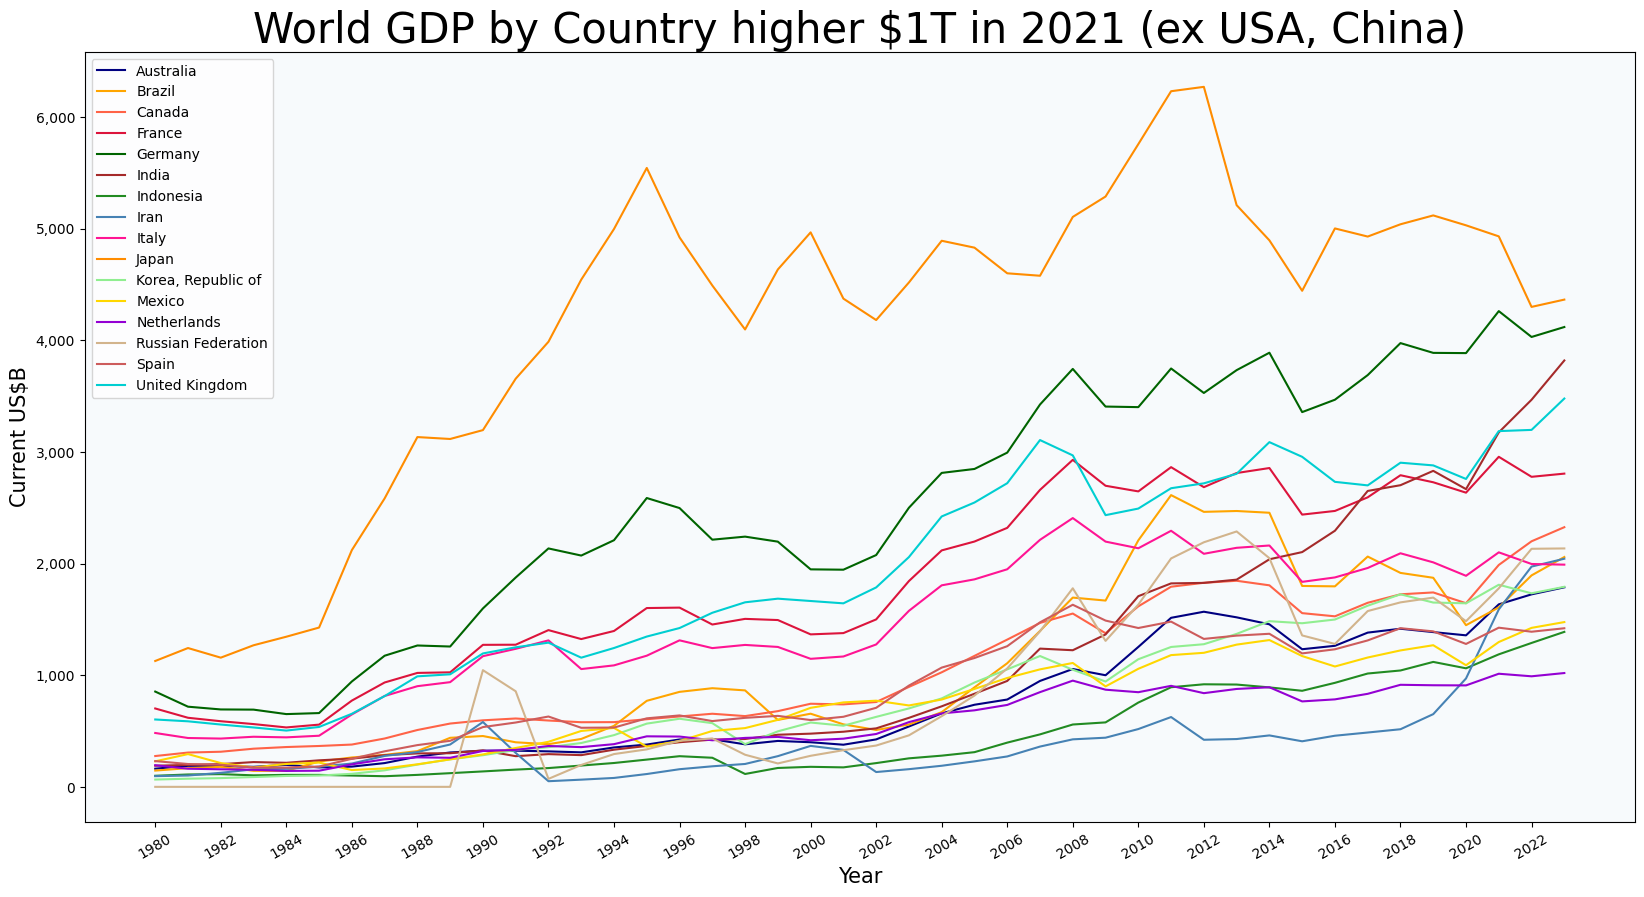

In [26]:
dfs = df[(df['2021']>1000)&(df['2021']<5000)]
lista = list(dfs.index)
graficos(dfs, lista,
         ancho=20, alto=10,
         columna_y='Current US$B',
         title='World GDP by Country higher $1T in 2021 (ex USA, China)', print_legend='Y')

Very cool information, Japan practically flat, with ups and downs, since 1992.

Also, Russia started in 1989, as previously it would be reported as USSR and Iran had a big jump in 2019.

Finally, we see a period of significant growth between 2002 and 2008 and COVID in 2019-2020.

And countries in the bottom 10% of GDP in 2021

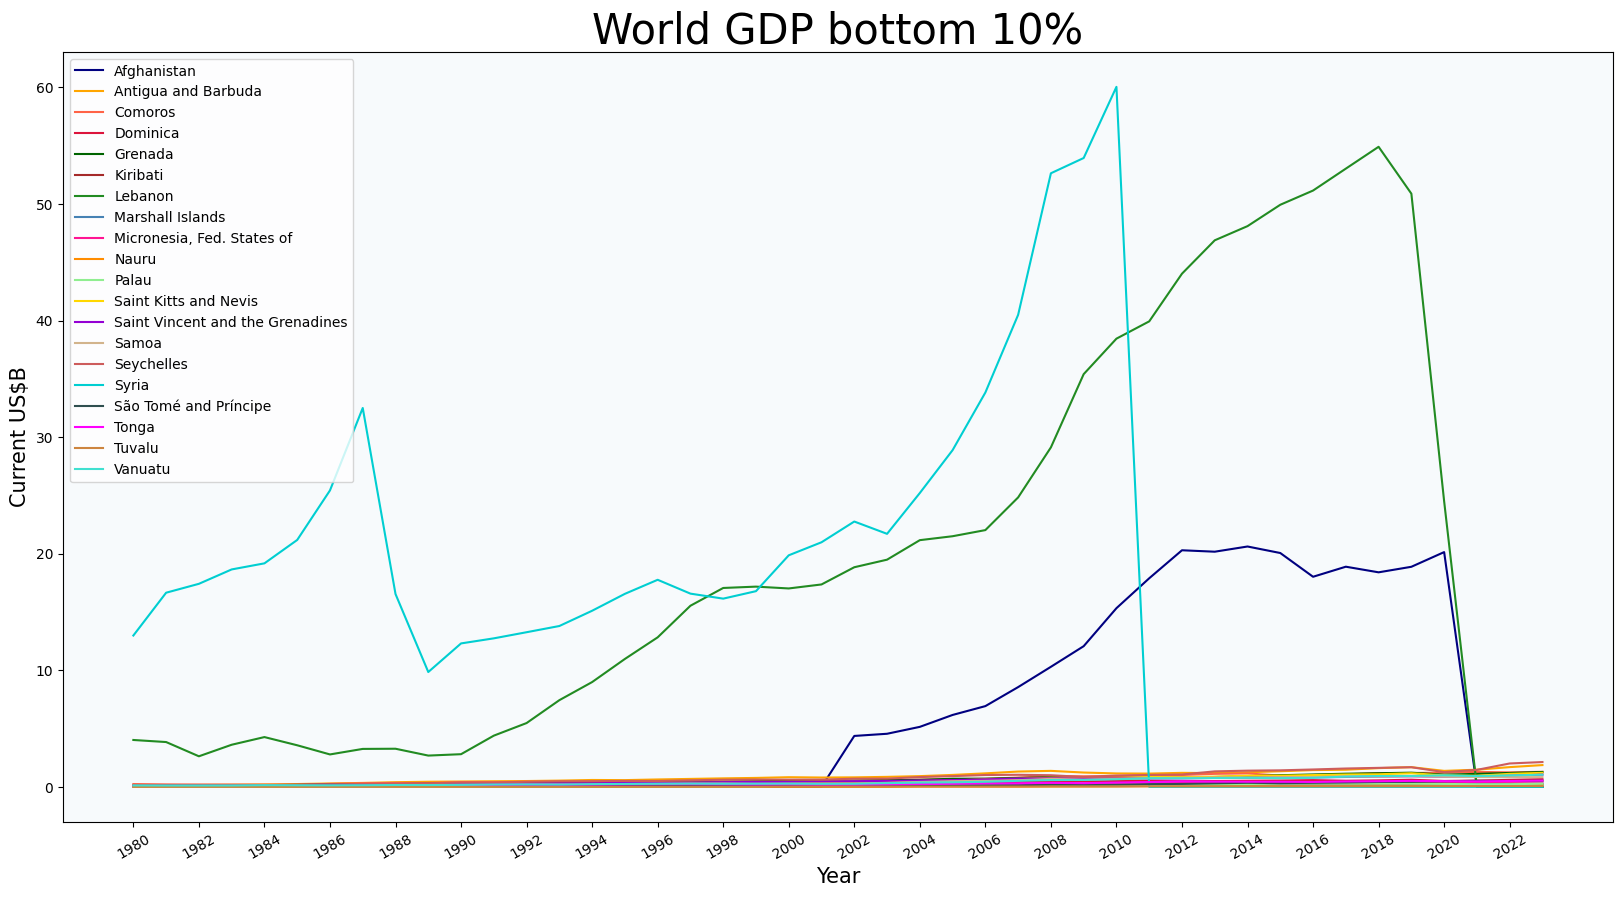

In [27]:
dfs = df[df['2021']<np.percentile(df['2021'], 10)]
lista = list(dfs.index)
graficos(dfs, lista,
         ancho=20, alto=10,
         columna_y='Current US$B',
         title='World GDP bottom 10%', print_legend='Y')

So, a good number of micro-countries as expected, and Afganistan, Syria and Lebanon not reported since certain years.

And Za Warudo

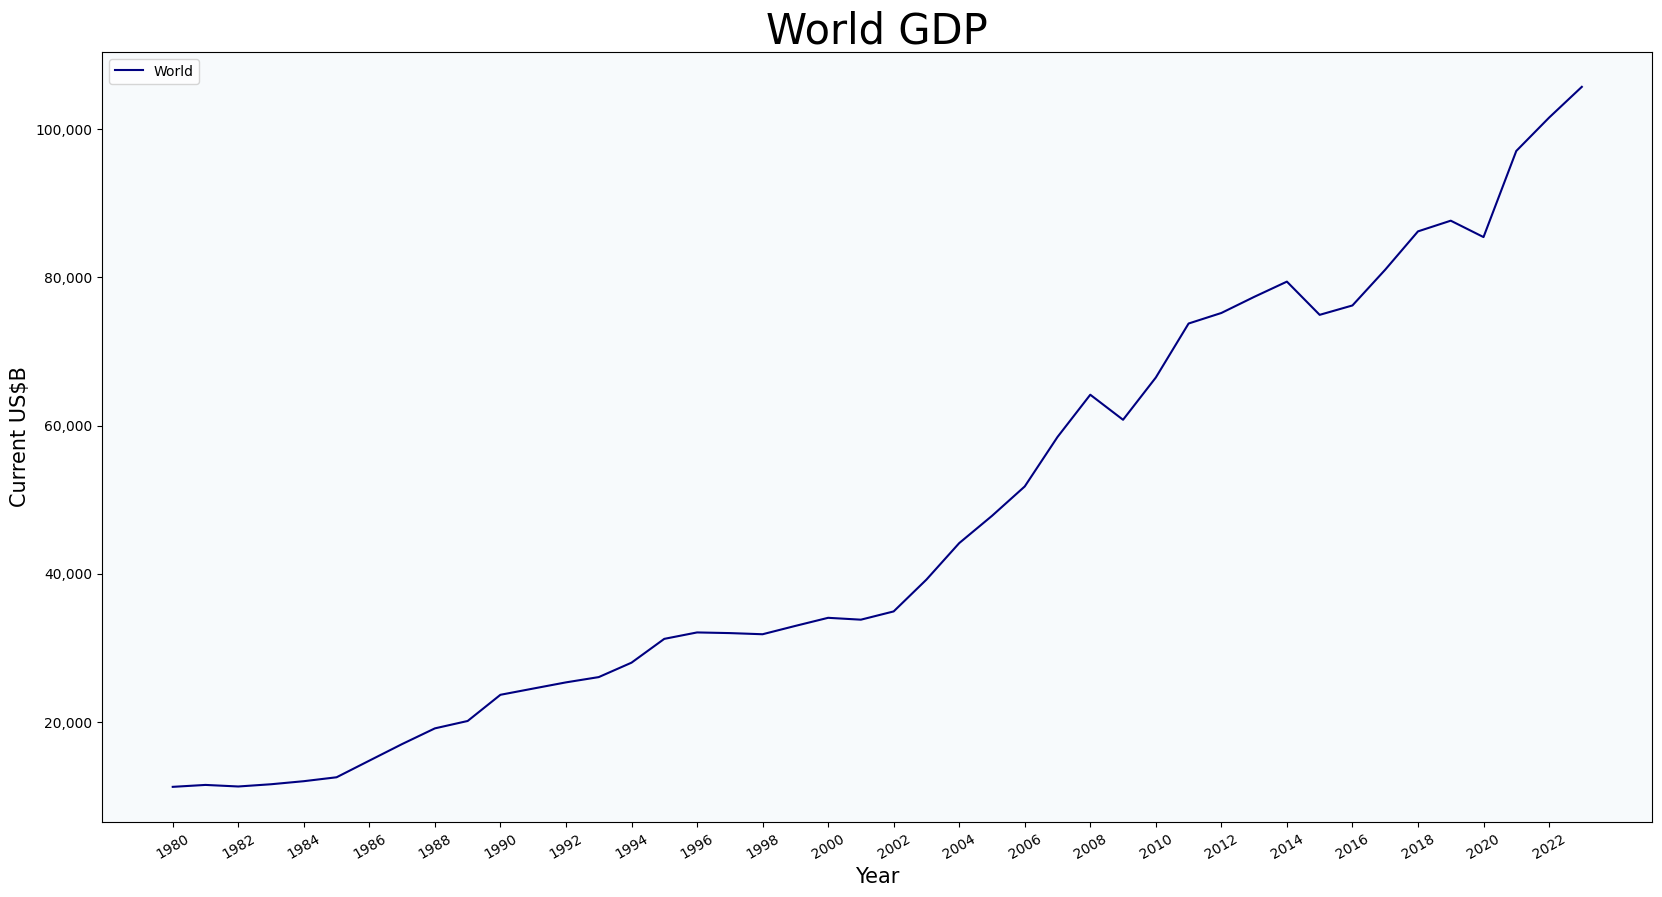

In [28]:
dft = pd.DataFrame(data=df.sum(axis=0), columns=['World']).T
graficos(dft, ['World',],
         ancho=20, alto=10,
         columna_y='Current US$B',
         title='World GDP', print_legend='Y')

Slow growth until 2000 (we should have a look at the number of countries, maybe we are missing some of them), high increase between 2002 and 2008, The Great Recession 2008 and 2009 (what about 2012?) and COVID 2019. But, the most remarkable insight (probably) is that the economies in the World as a whole are continuosly growing, part due to prices for sure. Can we split real growth from prices?

# Adding some more data

Now, I will change the dataset to Year/Country/GDP format, probably because I'm used to this format, and can add variances and other columns.

In [29]:
df_new = df.stack()
df_new = df_new.reset_index()
df_new = df_new.rename(columns={'level_1': 'Year',
                         0: 'GDP'})

And define a new function to chart this format.

In [30]:
def graficos2(df, columna_x, columna_y, columna_seleccion='', lista_seleccion=[],
              ancho=20,  alto=10,
              columna_y_title = '', title='', print_legend='Y',
              color_num=0,
              hor_line = 'N',
              hor_line_val = 0):

    # purpose is to define a function that can plot multiple charts
    # as most likely will be time series, we use the column for x axis
    # and multiple indexes in seleccion

    # Create the chart
    fig, ax = plt.subplots(figsize=(ancho, alto))

    # Set the title
    ax.set_title(title, fontsize=30)

    # Set the background color, never plain white
    ax.set_facecolor('#F7FAFC')
    # And add colors, preferibly non-saturated
    colores = ['navy', 'orange', 'tomato', 'crimson', 'darkgreen', 'brown',
               'forestgreen', 'steelblue', 'deeppink', 'darkorange', 'lightgreen', 'gold',
               'darkviolet', 'tan', 'indianred', 'darkturquoise', 'darkslategrey', 'magenta',
               'peru', 'turquoise',
              ]

    # We will use listas to plot multiple data in one chart, for comparable reasons
    # j is simply for color coding
    listas, color_code, leyenda = [], 0, []

    if lista_seleccion == []:
        x1 = df[columna_x]
        y1 = df[columna_y]
        color_code = color_num
        print(color_code)
        listas.append(((x1, y1), colores[color_code])) # Creating a listas item to be shown in the plot.
    else:
        for seleccion in lista_seleccion:
            dfg = df[df[columna_seleccion]==seleccion]
            x1 = dfg[columna_x]
            y1 = dfg[columna_y]
            if color_num != 0:
                color_code = color_num - len(colores)*(color_code//len(colores))
            listas.append(((x1, y1), colores[color_code])) # Creating a listas item to be shown.
            leyenda.append(seleccion)
            # Start over if we have more series than color.
            if color_code == len(colores)-1:
                color_code=0
            else:
                color_code+=1
            color_num+=1

    # Just plot the series.
    for lista in listas:
        ax.plot(*lista[0], color=lista[1])

    # And all features in the chart.
    if print_legend == 'Y':
        plt.legend(leyenda, loc='upper left', bbox_to_anchor=(1, 1))
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xticks(ax.get_xticks()[::2])
    for label in ax.get_xticklabels():
        label.set(rotation=30)
    if hor_line == 'Y':
        plt.axhline(y=hor_line_val, color='r')
    plt.xlabel(columna_x, fontsize=15)
    plt.ylabel(columna_y_title, fontsize=15)
    plt.show()

And a sanity check...

In [31]:
dfn_group = df_new.groupby(by='Year', as_index=False).sum()

<ipython-input-31-77cc360106c7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfn_group = df_new.groupby(by='Year', as_index=False).sum()


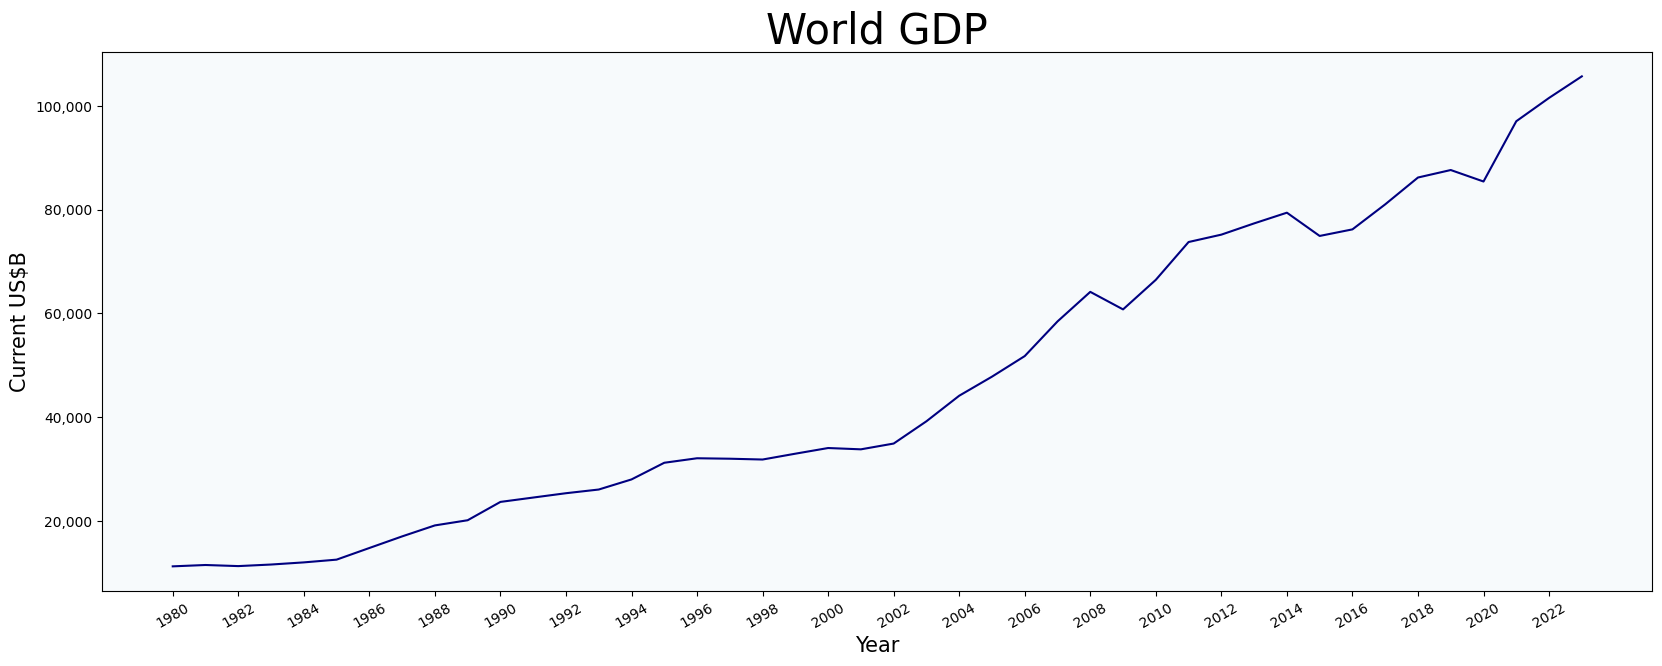

0


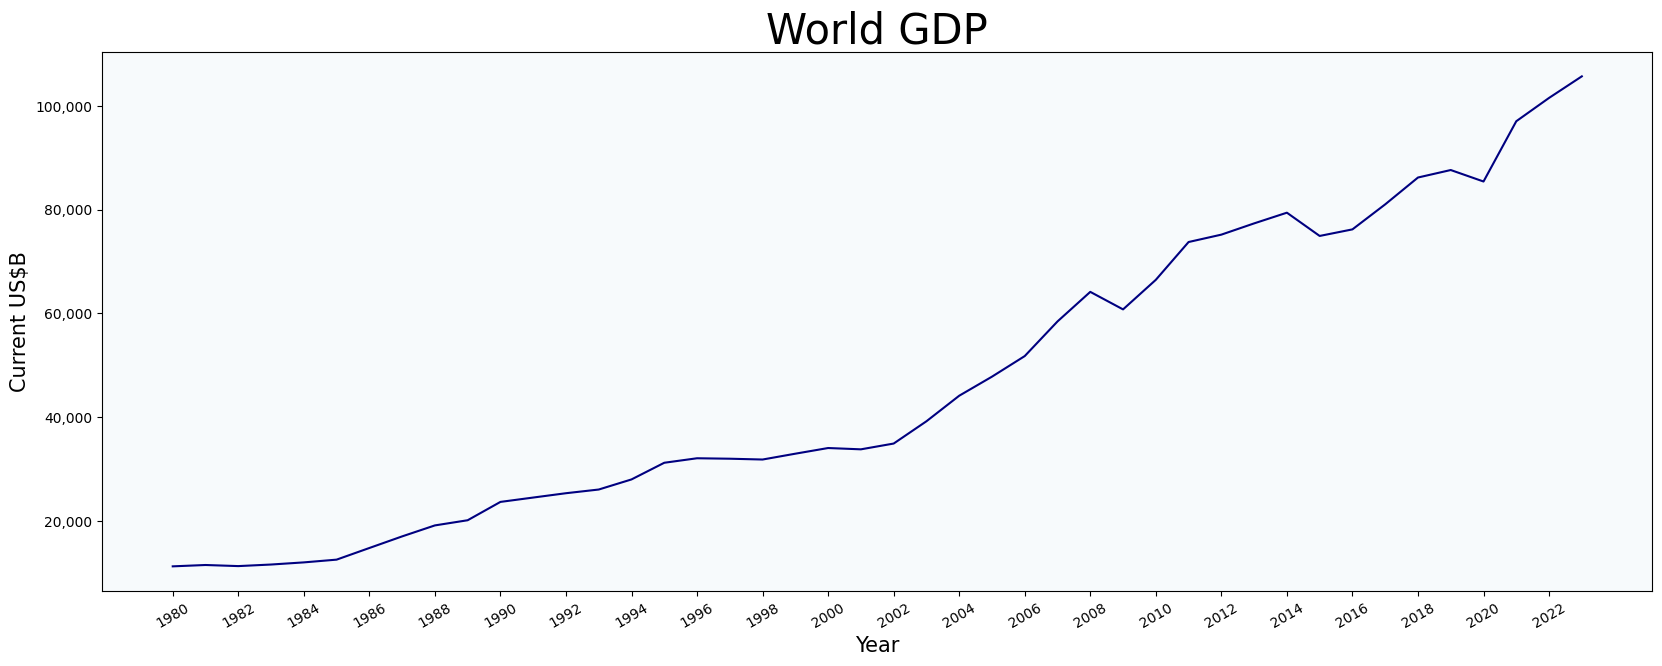

In [32]:
graficos(dft, ['World',],
         ancho=20, alto=7,
         columna_y='Current US$B',
         title='World GDP', print_legend='N')
graficos2(dfn_group, 'Year', 'GDP',
         columna_seleccion='', lista_seleccion=[],
         ancho=20, alto=7,
         columna_y_title='Current US$B',
         title='World GDP', print_legend='N')

Now we start adding more info to the dataset.

Let's start with variances to prior year and second variance to see trends.

In [33]:
dfn = df_new.copy()
dfn_2 = pd.DataFrame(columns=['Year', 'Country', 'GDP', 'GDP-1'])
for country in countries:
    seleccion = dfn.loc[dfn['Country']==country]
    seleccion['GDP-1'] = seleccion['GDP'].shift(1)
    dfn_2 = dfn_2.append(seleccion)

<ipython-input-33-a36b9d4b589f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['GDP-1'] = seleccion['GDP'].shift(1)
<ipython-input-33-a36b9d4b589f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn_2 = dfn_2.append(seleccion)
<ipython-input-33-a36b9d4b589f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['GDP-1'] = seleccion['GDP'].shift(1)
<ipython-input-33-a36b9d4b589f>:6: FutureWarning: The 

In [34]:
dfn_2['Var1'] = (dfn_2['GDP']/dfn_2['GDP-1'])*100-100

In [35]:
dfn_3 = pd.DataFrame(columns=['Year', 'Country', 'GDP', 'GDP-1', 'Var1'])
for country in countries:
    seleccion = dfn_2.loc[dfn_2['Country']==country]
    seleccion['Var1-1'] = seleccion['Var1'].shift(1)
    dfn_3 = dfn_3.append(seleccion)

<ipython-input-35-19aacef55702>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['Var1-1'] = seleccion['Var1'].shift(1)
<ipython-input-35-19aacef55702>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn_3 = dfn_3.append(seleccion)
<ipython-input-35-19aacef55702>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['Var1-1'] = seleccion['Var1'].shift(1)
<ipython-input-35-19aacef55702>:5: FutureWarning: 

In [36]:
dfn_3['Var2'] = (dfn_3['Var1']/dfn_3['Var1-1'])*100

In [37]:
dfn = dfn_3.copy()
# keep dfn_3 for future work

# More Viz

Once we have some additional info in the df, let's select some countries and play with the numbers

In [38]:
lista = dfn[(dfn['Year']=='2021')&(dfn['GDP']>1000)]['Country'].unique()
dfn = dfn[dfn['Country'].isin(lista)]

Plot the increase in GDP YOY in % for the list of countries

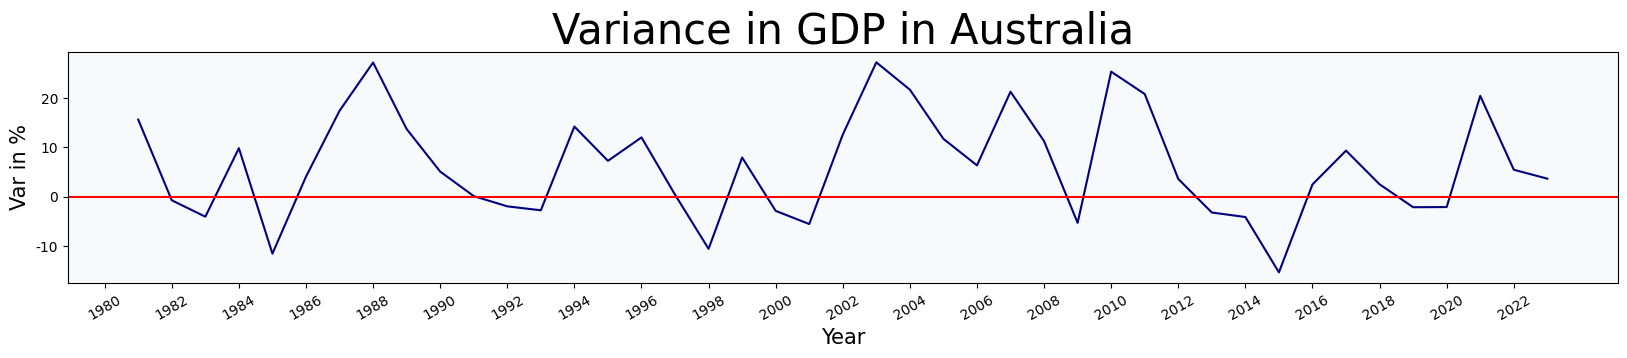

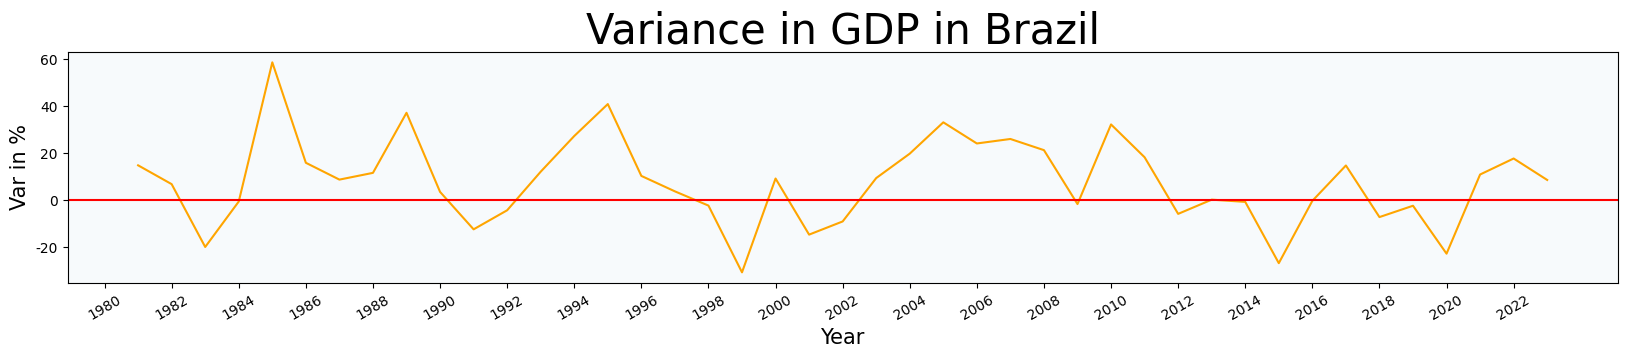

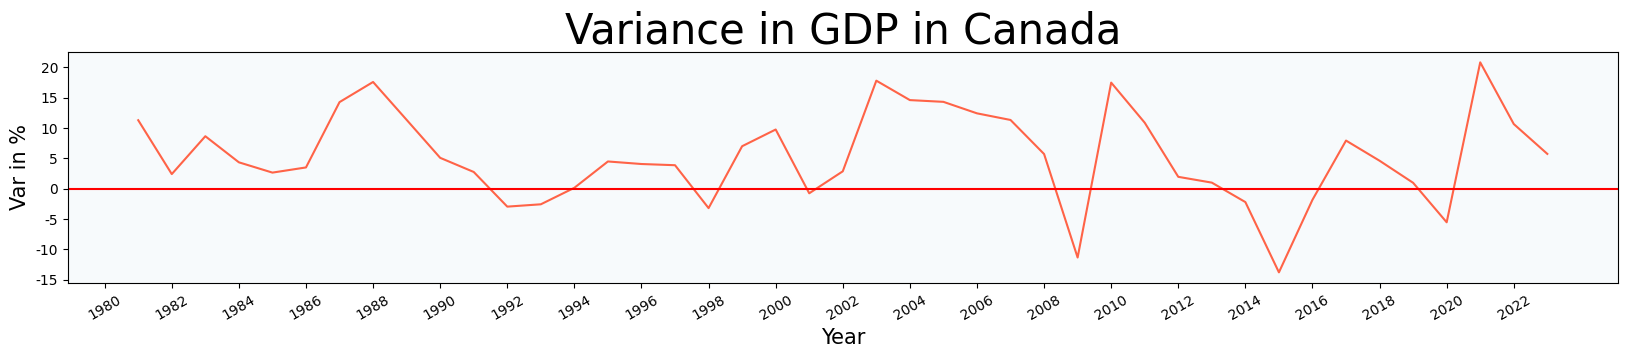

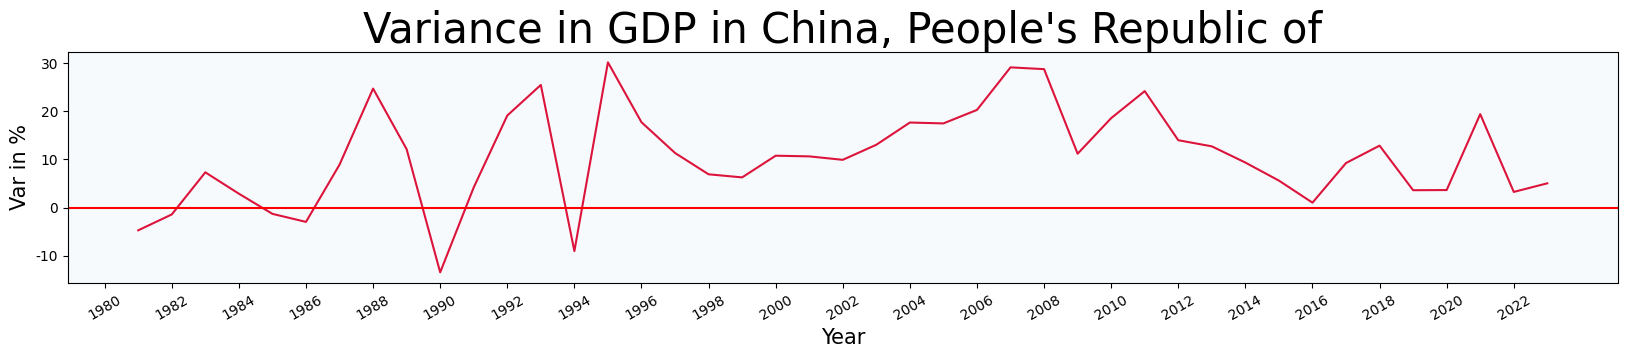

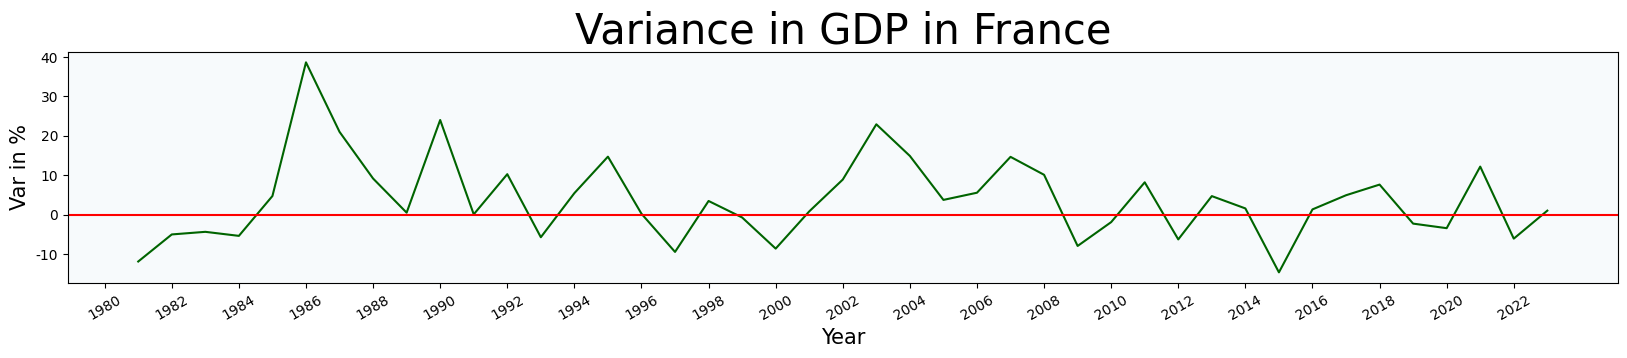

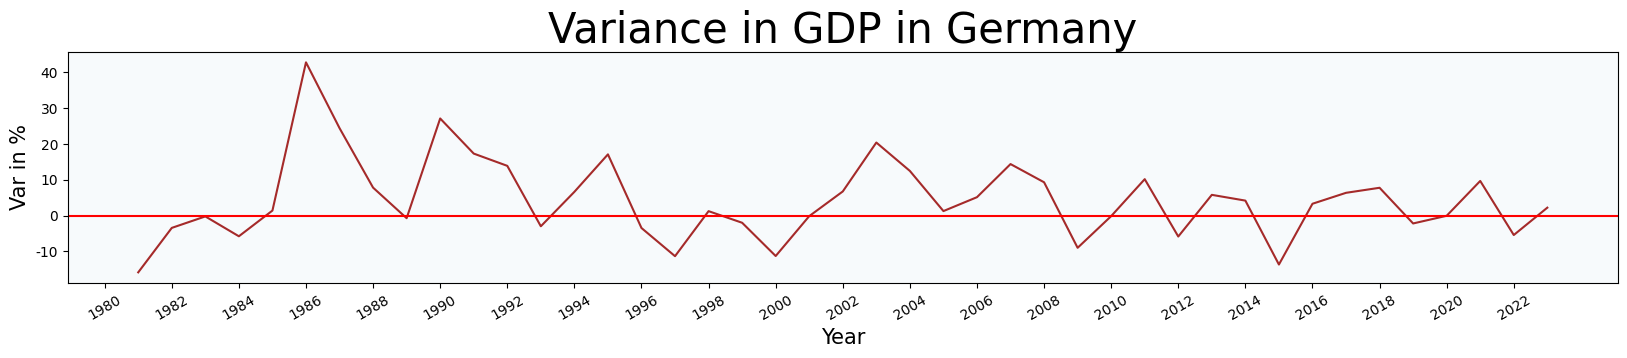

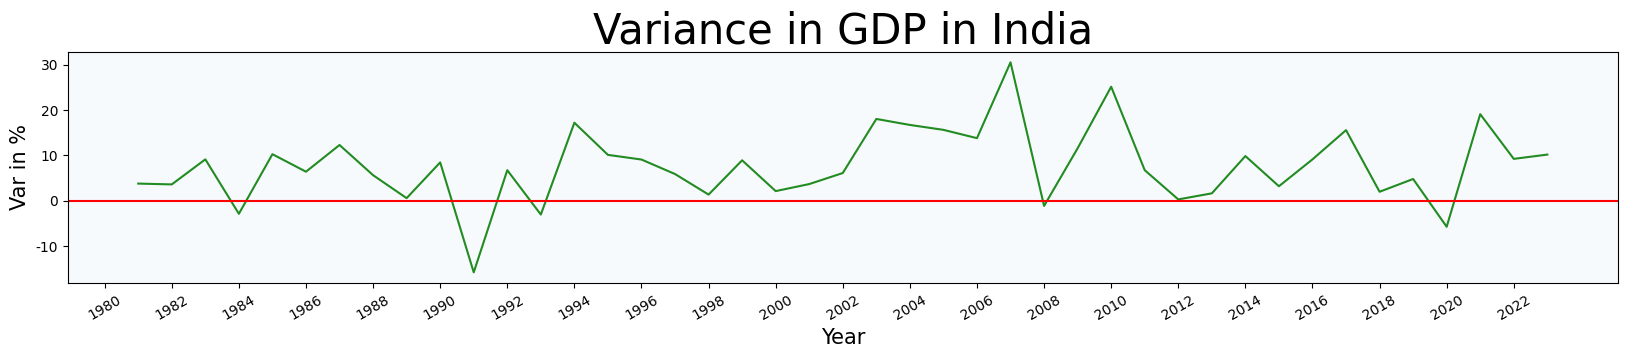

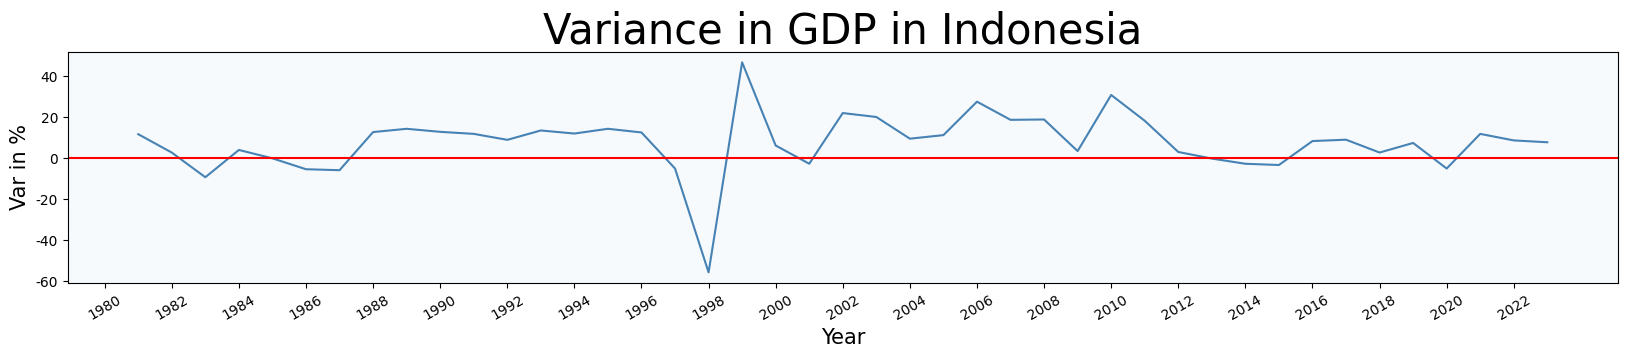

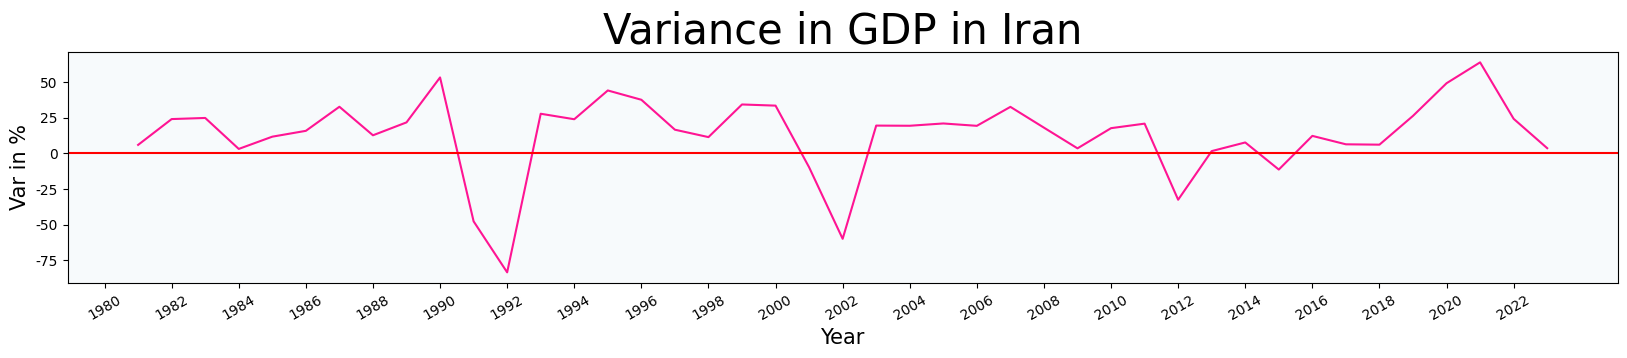

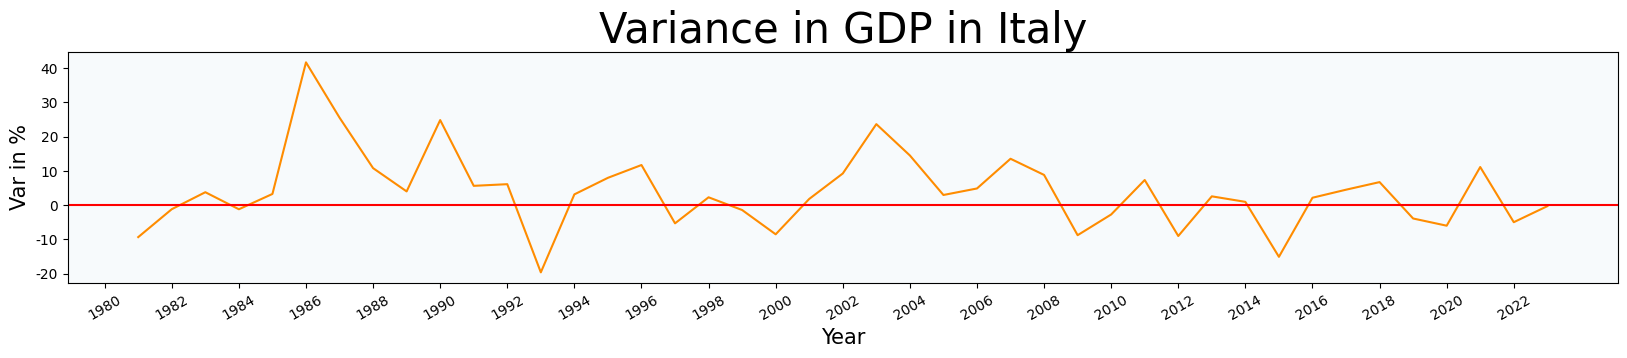

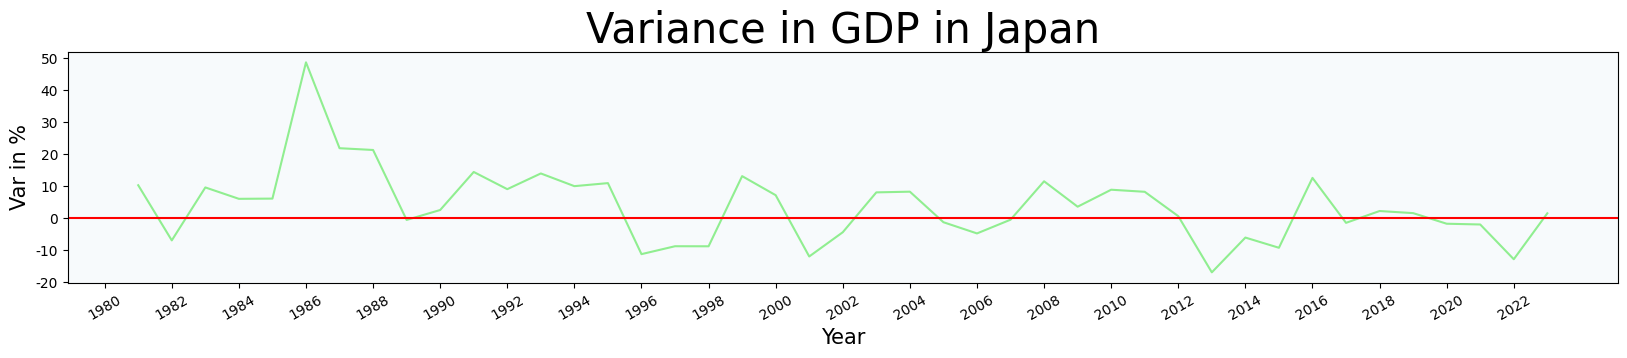

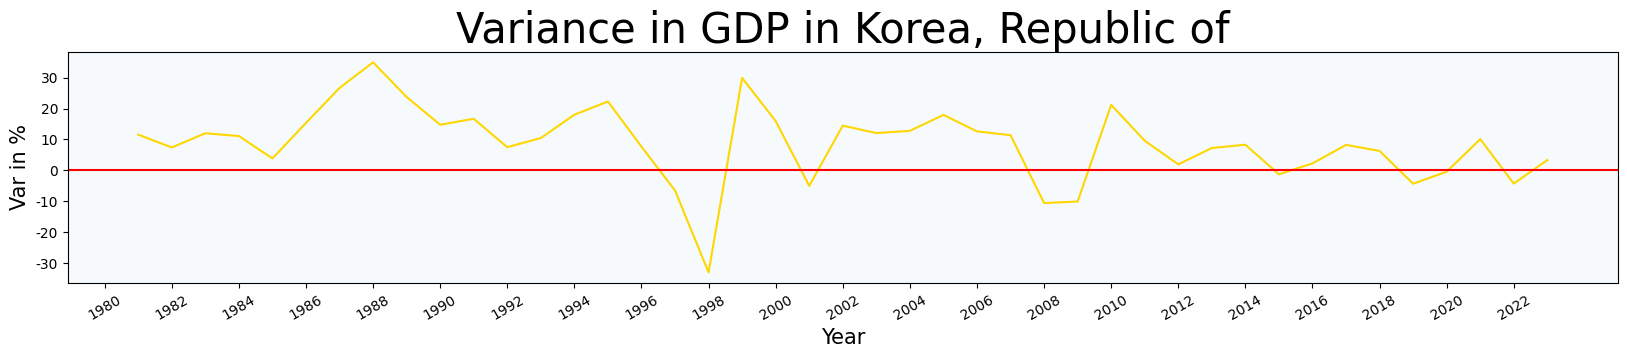

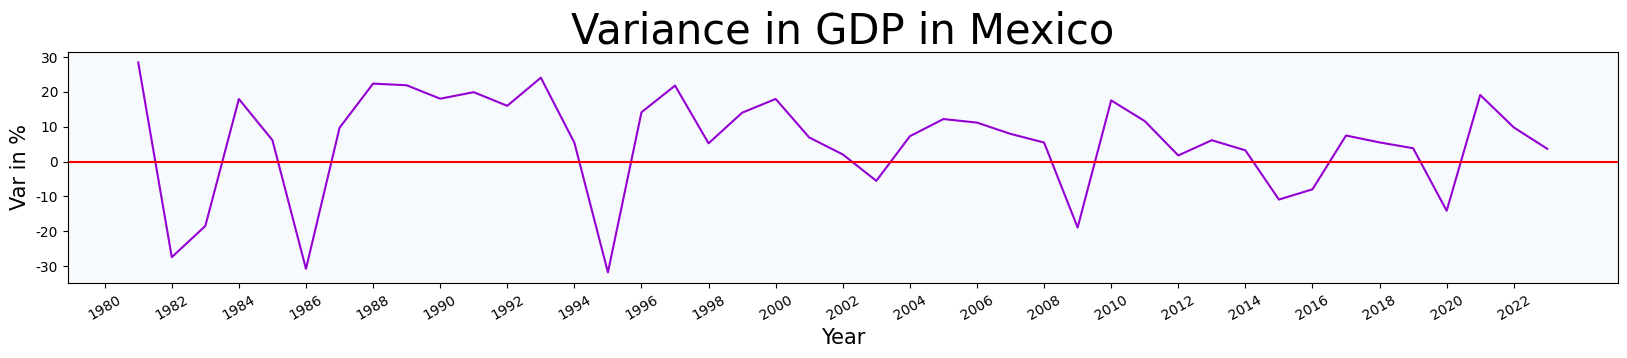

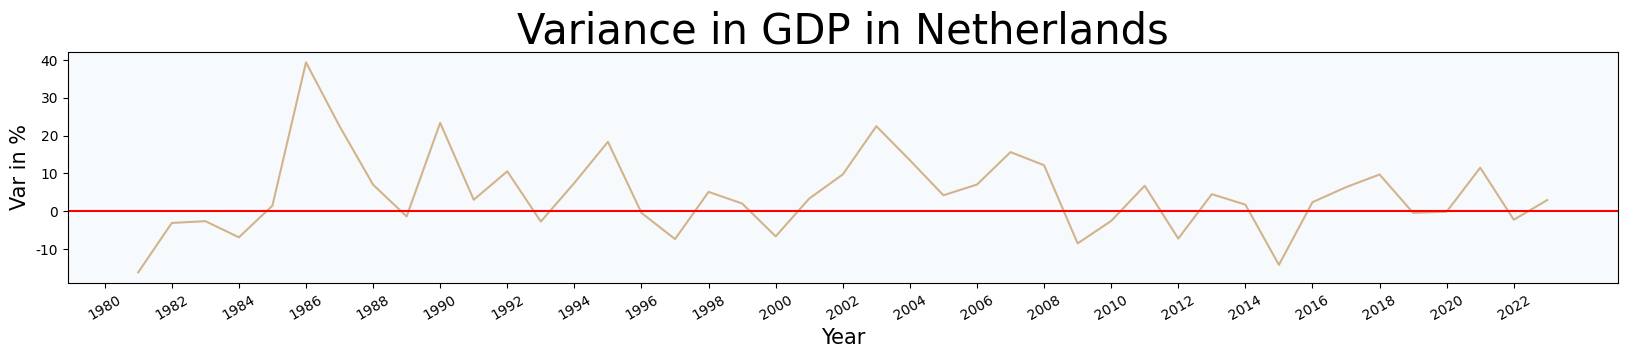

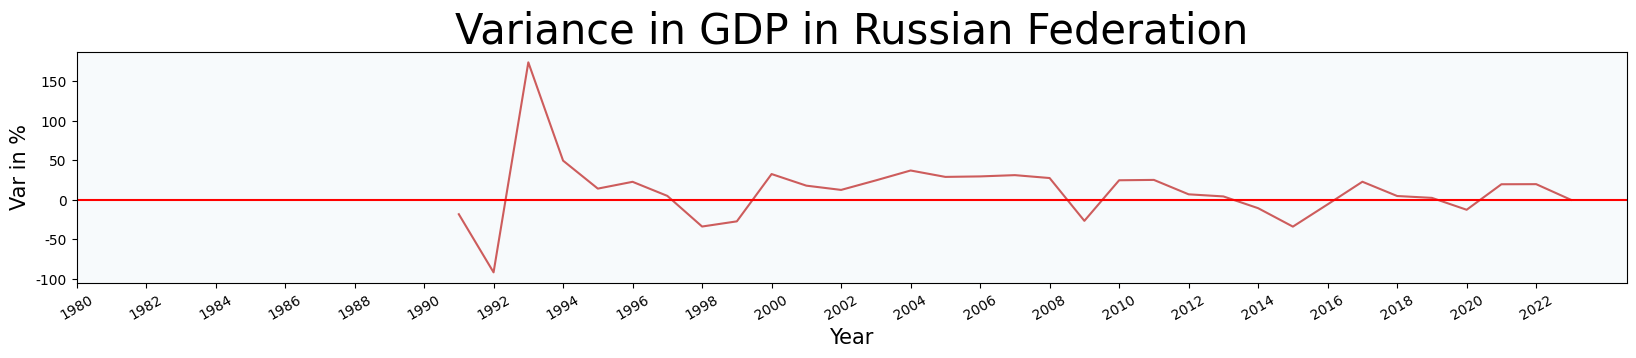

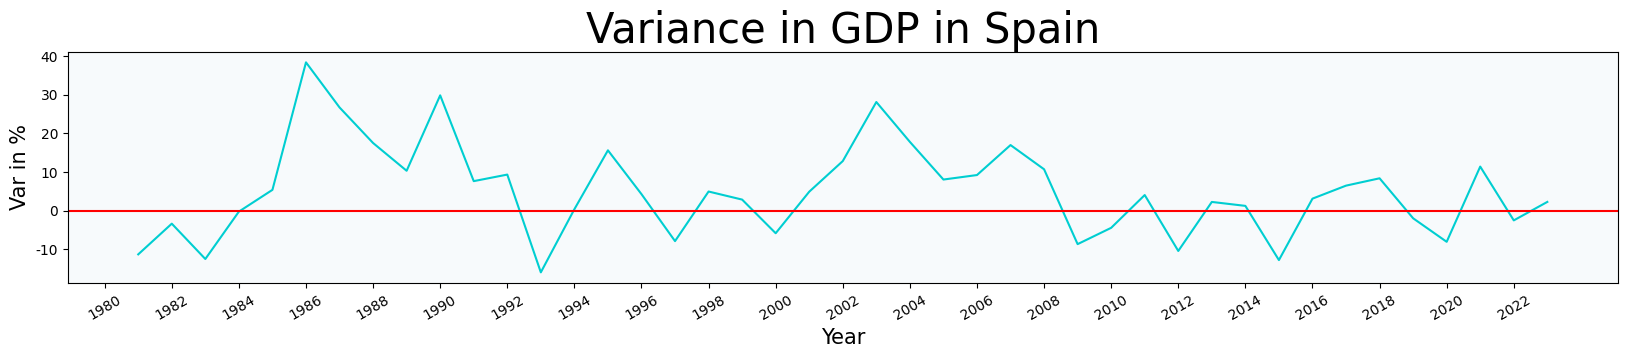

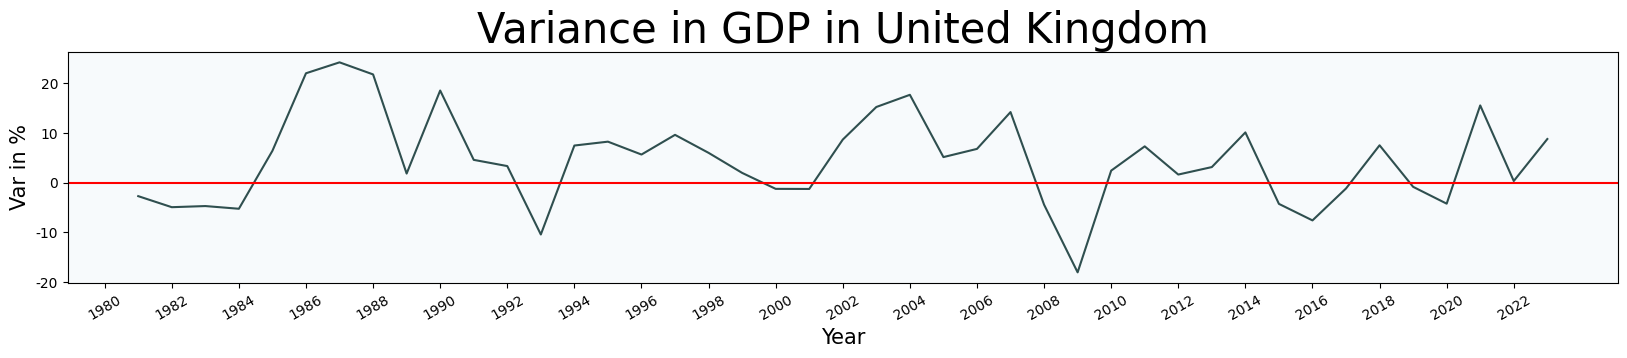

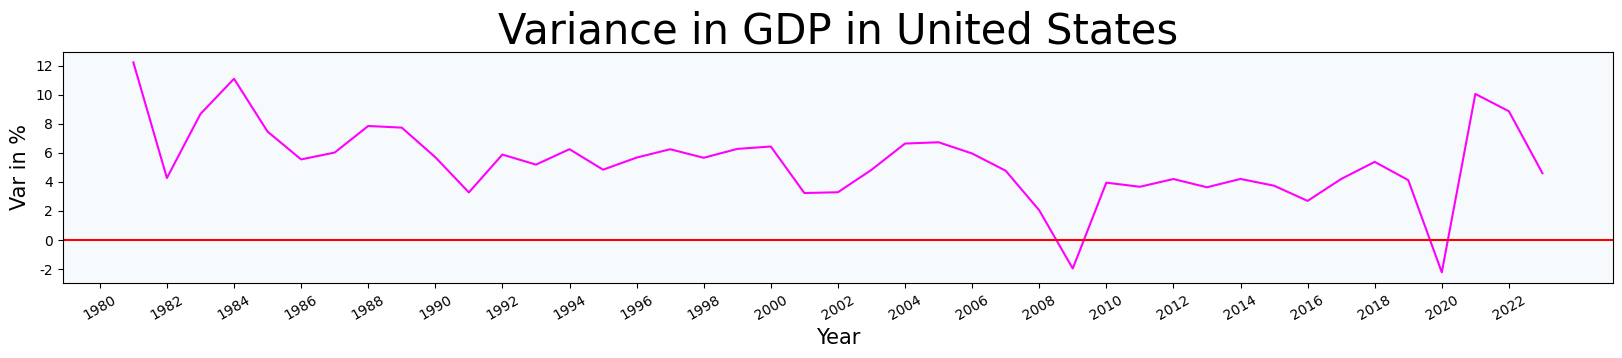

In [50]:
colorc = 0
for pais in lista:
    graficos2(dfn, 'Year', 'Var1',
             columna_seleccion='Country', lista_seleccion=[pais,],
             ancho=20, alto=3,
             columna_y_title='Var in %',
             title='Variance in GDP in '+pais, print_legend='N',
             color_num=colorc,
             hor_line='Y',
             hor_line_val=0)
    colorc += 1

We can explore how economies are intergrated, by simply calculate the correlation between GDPs var in % by all pair of countries in this group, as correlation will measure how the variance in GDP will be happengin at the same time.

Of course, the assumption is that similar variances in GDP are sign of integration, but that is not necessarily true, as, for example, they could be caused by the same external cause, not to integration.

In [40]:
# I will use a pivot with GDP var to calculate correlation in the var series
pt = pd.pivot_table(dfn, index=['Year'], columns=['Country'], values=['Var1'], \
                   aggfunc = [np.sum], margins=False)
pt_corr = pt.corr()

And now show the pairs in a simple heatmap:

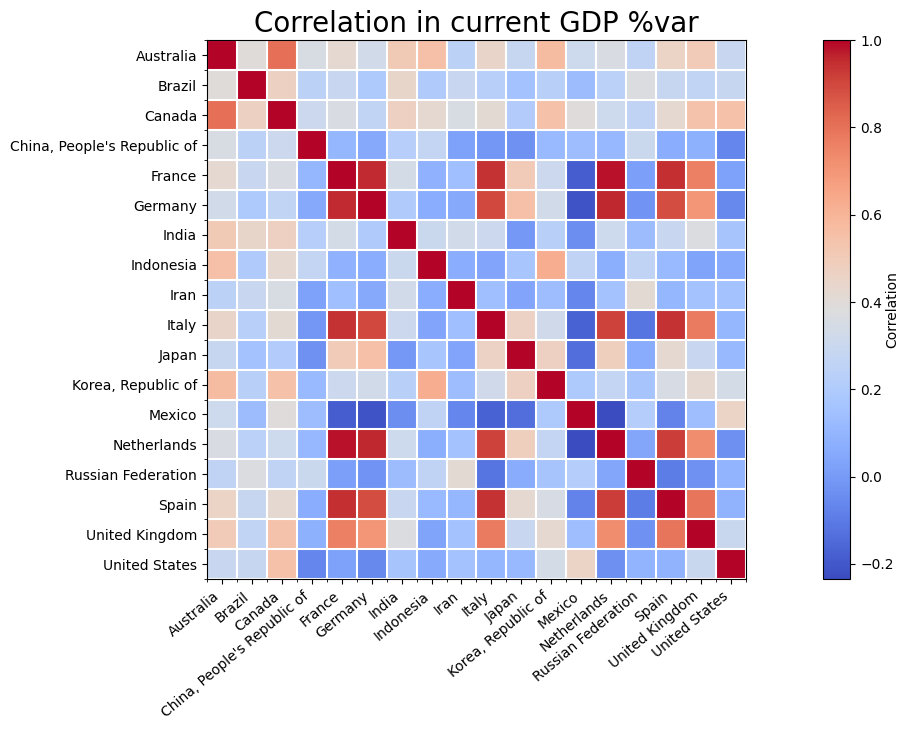

In [41]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Correlation in current GDP %var', fontsize=20)

# the heatmap and colorbar
im = ax.imshow(pt_corr, cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation', rotation=90, va="bottom")

# adding chart features
ax.set_xticks(range(len(lista)), labels=lista)
ax.set_yticks(range(len(lista)), labels=lista)
# the white border
ax.set_xticks(np.arange(-.5, len(lista)), minor=True)
ax.set_yticks(np.arange(-.5, len(lista)), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=1.5)

for label in ax.get_xticklabels():
    label.set(rotation=40, ha='right')

plt.show()

Very interesting again: first thing that comes out is a block with very "integrated" economies: France, Germany, Italy, Holland, Spain, and slightly lower, UK. So, the EU shows up here.

Then, the variances in the superpowers are not externally related: US top partners are Canada and Mexico (totally expected) and almost neutral to Korea and UK. And China is not red at all, maybe Australia and Russia (we have to take Russia carefully, due to the lack of data before 1990).

Mexico correlation is mostly negative, except US and Canada.

Australia and Canada are very similar, with strng relationship between the two countries.

Indonesia partners with Australia and Korea.

But, does it matter, anyway? Is integration a good or a bad thing? Or simply irrelevant?

Let´s use the pt_corr df, to aggregate correlations as average

In [42]:
dfn_4 = pd.DataFrame(data=pt_corr.mean(axis=0)).reset_index()
dfn_4 = dfn_4.rename(columns={0: 'Corr_mean'})
dfn_4 = dfn_4.drop(['level_0', 'level_1'], axis=1)
print(dfn_4)

                        Country  Corr_mean
0                     Australia   0.450267
1                        Brazil   0.318022
2                        Canada   0.449408
3   China, People's Republic of   0.182805
4                        France   0.444012
5                       Germany   0.397038
6                         India   0.310006
7                     Indonesia   0.255790
8                          Iran   0.207856
9                         Italy   0.423705
10                        Japan   0.280372
11           Korea, Republic of   0.368525
12                       Mexico   0.117389
13                  Netherlands   0.422092
14           Russian Federation   0.185509
15                        Spain   0.440730
16               United Kingdom   0.434225
17                United States   0.215471


And now the cummulative average growth rate from 1980 to 2023:

In [43]:
dfn_5 = pd.DataFrame(columns=['Country', 'CAGR'])
for pais in lista:
    df_sample = dfn[dfn['Country']==pais]
    df_sample = df_sample.dropna()
    valor = ((df_sample.iloc[-1, 2]/df_sample.iloc[0, 2])**(1/len(df_sample)) - 1)*100
    valor2 = df_sample.iloc[0, 2]*((1+valor/100)**len(df_sample)) - df_sample.iloc[-1, 2]
    dfn_5 = dfn_5.append({'Country': pais,
                         'CAGR': valor,
                         'Size': len(df_sample),
                         'Check': valor2},
                         ignore_index=True)
print(dfn_5)

                        Country       CAGR  Size         Check
0                     Australia   5.523558  42.0  2.955858e-12
1                        Brazil   5.986332  42.0 -8.640200e-12
2                        Canada   4.878967  42.0  4.092726e-12
3   China, People's Republic of  10.553582  42.0  1.455192e-11
4                        France   3.791562  42.0 -8.185452e-12
5                       Germany   4.333776  42.0 -6.366463e-12
6                         India   7.231177  42.0 -7.275958e-12
7                     Indonesia   6.137342  42.0 -1.136868e-12
8                          Iran   6.863488  42.0 -5.684342e-12
9                         Italy   3.701744  42.0 -6.821210e-12
10                        Japan   3.211176  42.0  1.909939e-11
11           Korea, Republic of   7.737548  42.0 -2.728484e-12
12                       Mexico   4.716698  42.0  2.501110e-12
13                  Netherlands   4.550319  42.0 -2.955858e-12
14           Russian Federation   2.808870  33.0  2.273

<ipython-input-43-2b9c3095f585>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn_5 = dfn_5.append({'Country': pais,
<ipython-input-43-2b9c3095f585>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn_5 = dfn_5.append({'Country': pais,
<ipython-input-43-2b9c3095f585>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn_5 = dfn_5.append({'Country': pais,
<ipython-input-43-2b9c3095f585>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn_5 = dfn_5.append({'Country': pais,
<ipython-input-43-2b9c3095f585>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Merge and plot:

In [44]:
dfn_plot = pd.merge(dfn_4, dfn_5, how='left', on=['Country'])

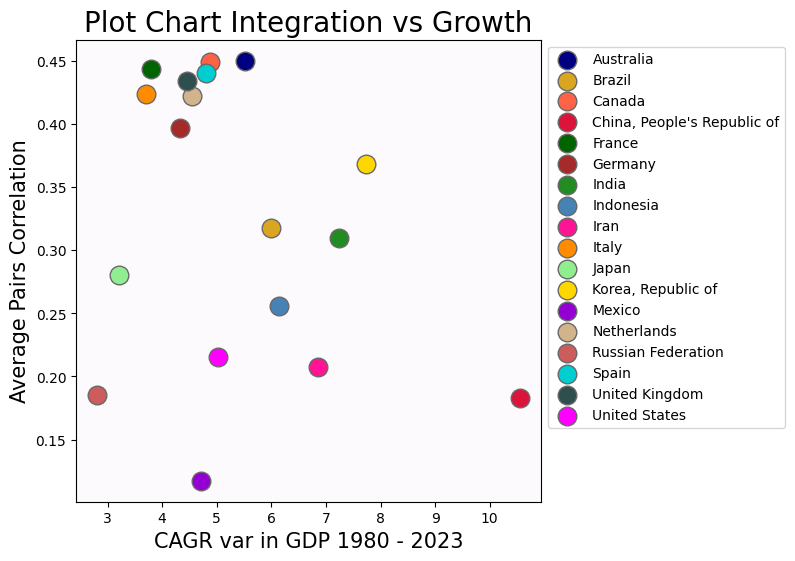

In [45]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Plot Chart Integration vs Growth', fontsize=20)
ax.set_facecolor('#FDFAFD')

# my colors
colores = ['navy', 'goldenrod', 'tomato', 'crimson', 'darkgreen', 'brown',
           'forestgreen', 'steelblue', 'deeppink', 'darkorange', 'lightgreen', 'gold',
           'darkviolet', 'tan', 'indianred', 'darkturquoise', 'darkslategrey', 'magenta',
           'peru', 'turquoise',
          ]

for i in range(len(dfn_plot)):
    ax.scatter(dfn_plot['CAGR'][i], dfn_plot['Corr_mean'][i],
               label=dfn_plot['Country'][i],
               s=180, c=colores[i], linewidth=1,edgecolor='dimgrey')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('CAGR var in GDP 1980 - 2023', fontsize=15)
plt.ylabel('Average Pairs Correlation', fontsize=15)

plt.show()

So, the group of countries highly integrated enjoyed a relatively low GDP increase in those years. Then countries with an apparent linear relationship between integration and growth, one of them USA. And three outliers, Japan, very slow growth, Mexico almost not integrated and China, very strong growth but also on its own.

Of course, this is just for fun and there are many other implications, like GDP per person and diminishing marginal returns.

# A new sample

What if we repeat the same analysis for a different group of countries?

In [46]:
dfm = dfn_3.copy()
lista2 = dfm[(dfm['Year']=='2021')&(dfm['GDP']<500)&(dfm['GDP']>300)]['Country'].unique()
# selected $300B to $500B just to set a range
lista2 = np.append(lista2, ['United States', "China, People's Republic of"])
# I add USA and China as major players in the World
lista2 = np.sort(lista2)
dfm = dfm[dfm['Country'].isin(lista2)]

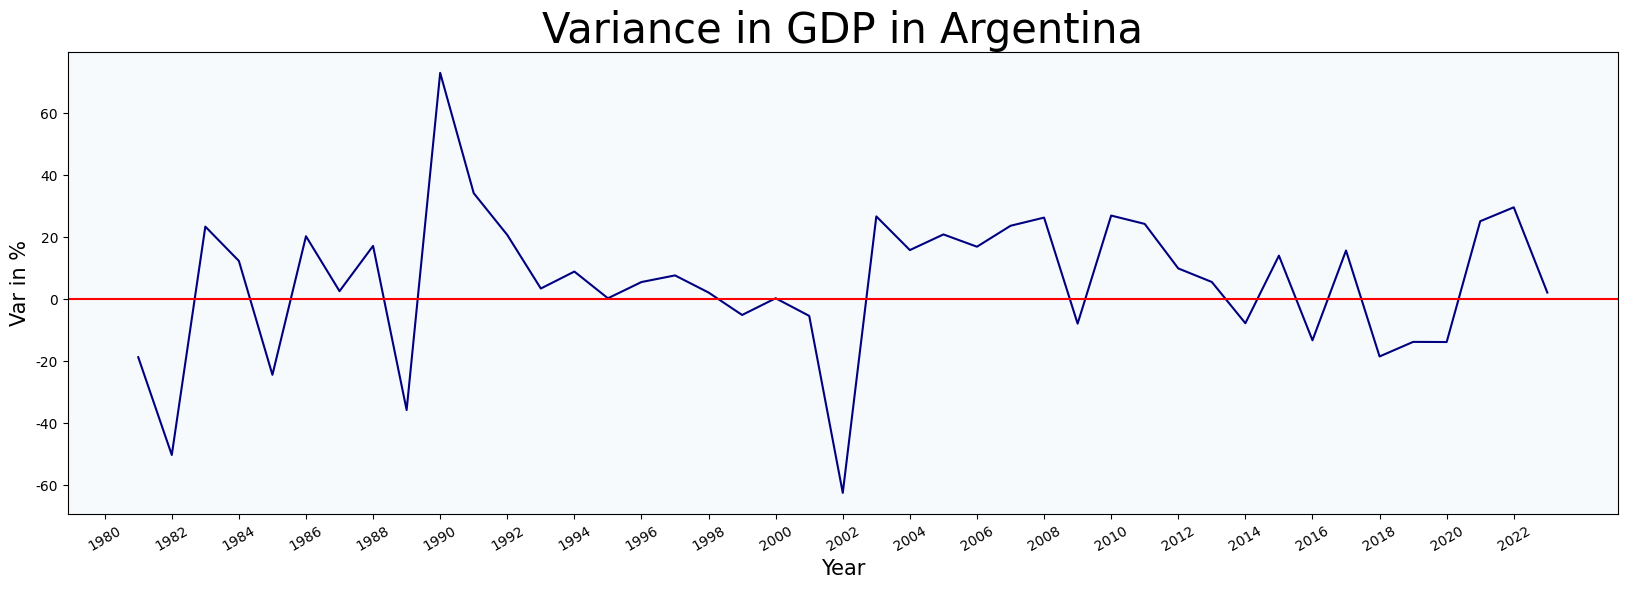

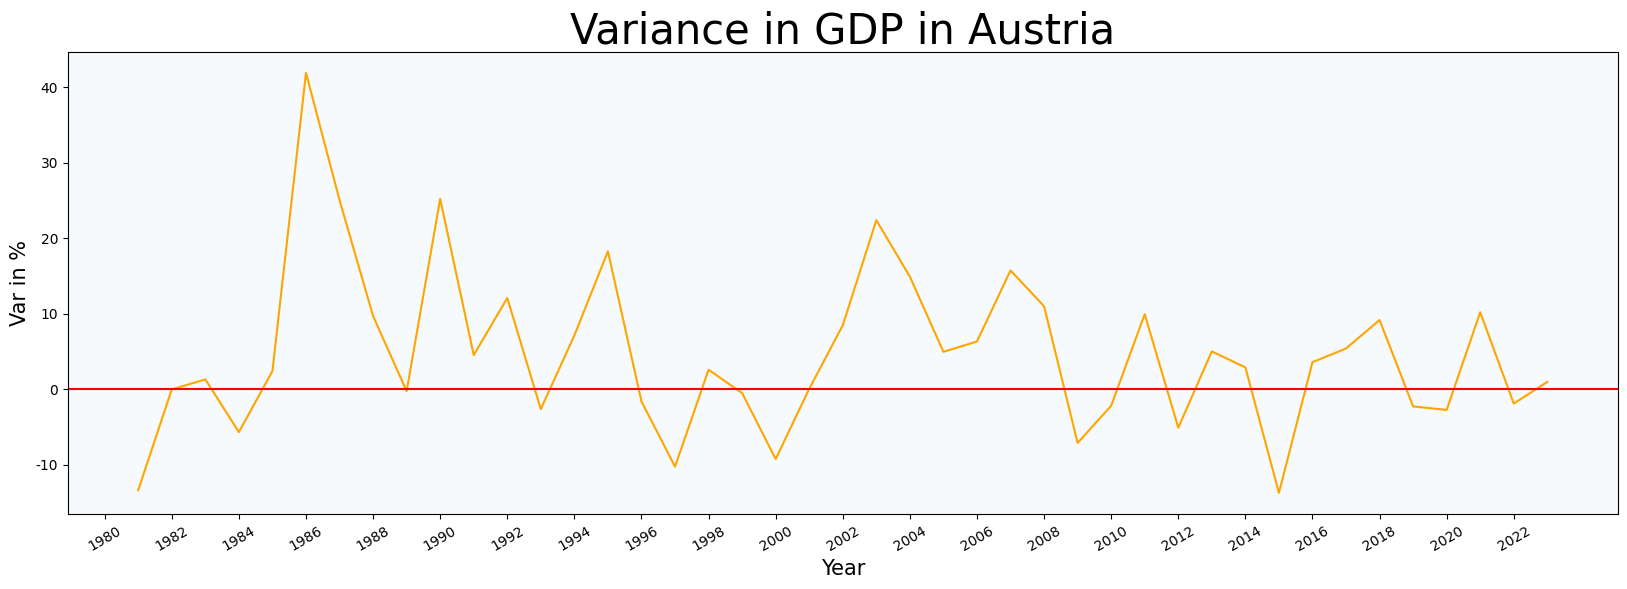

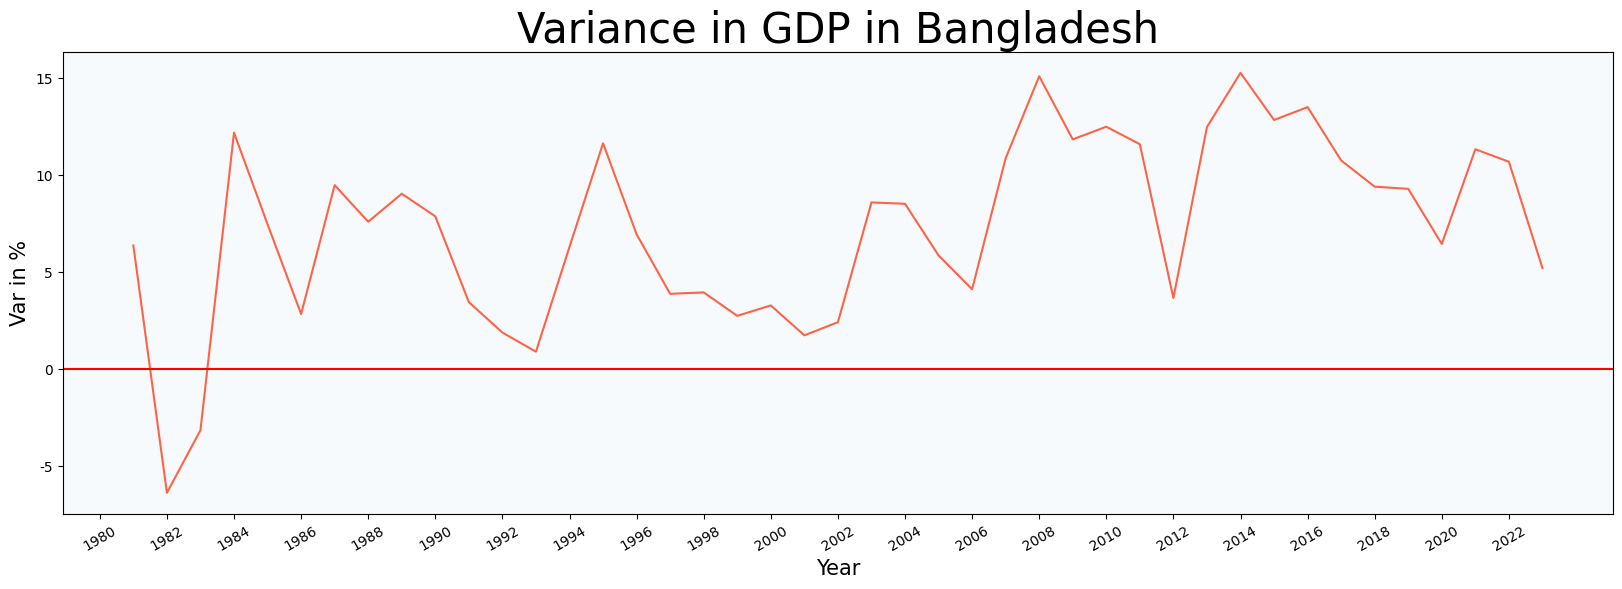

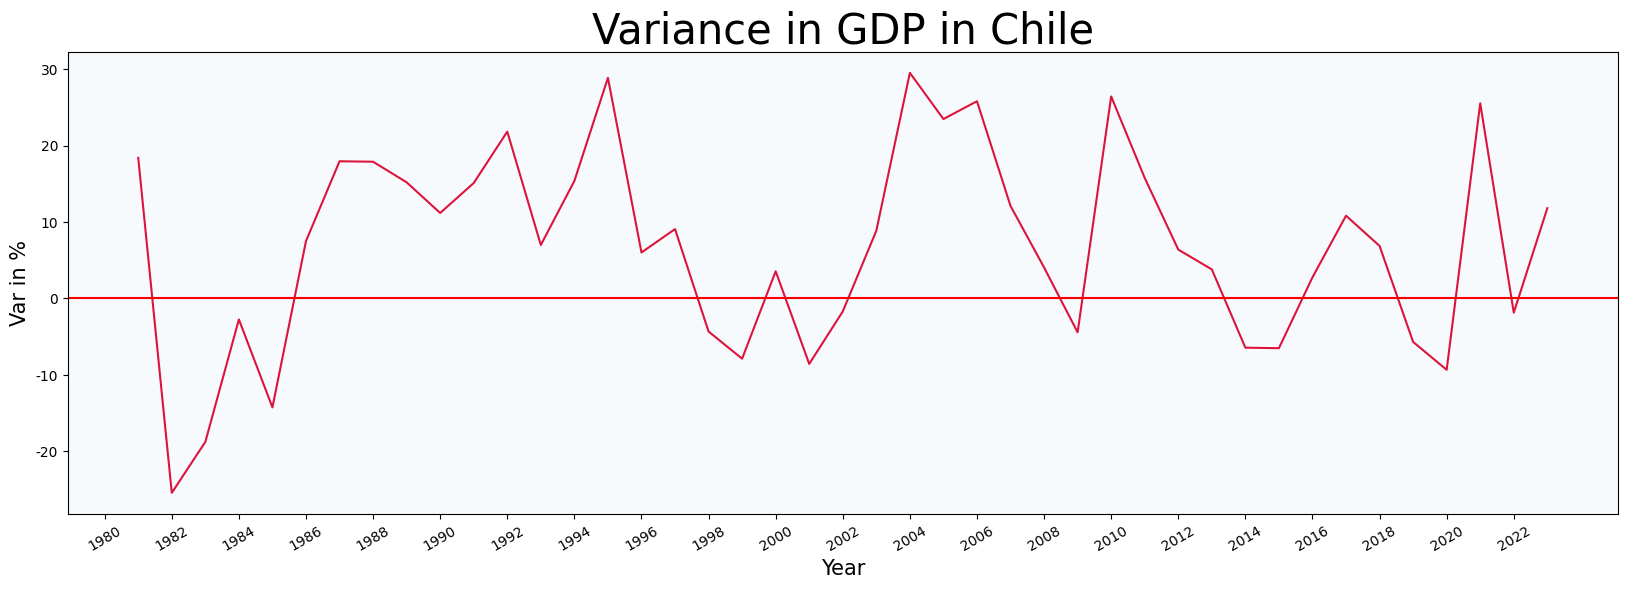

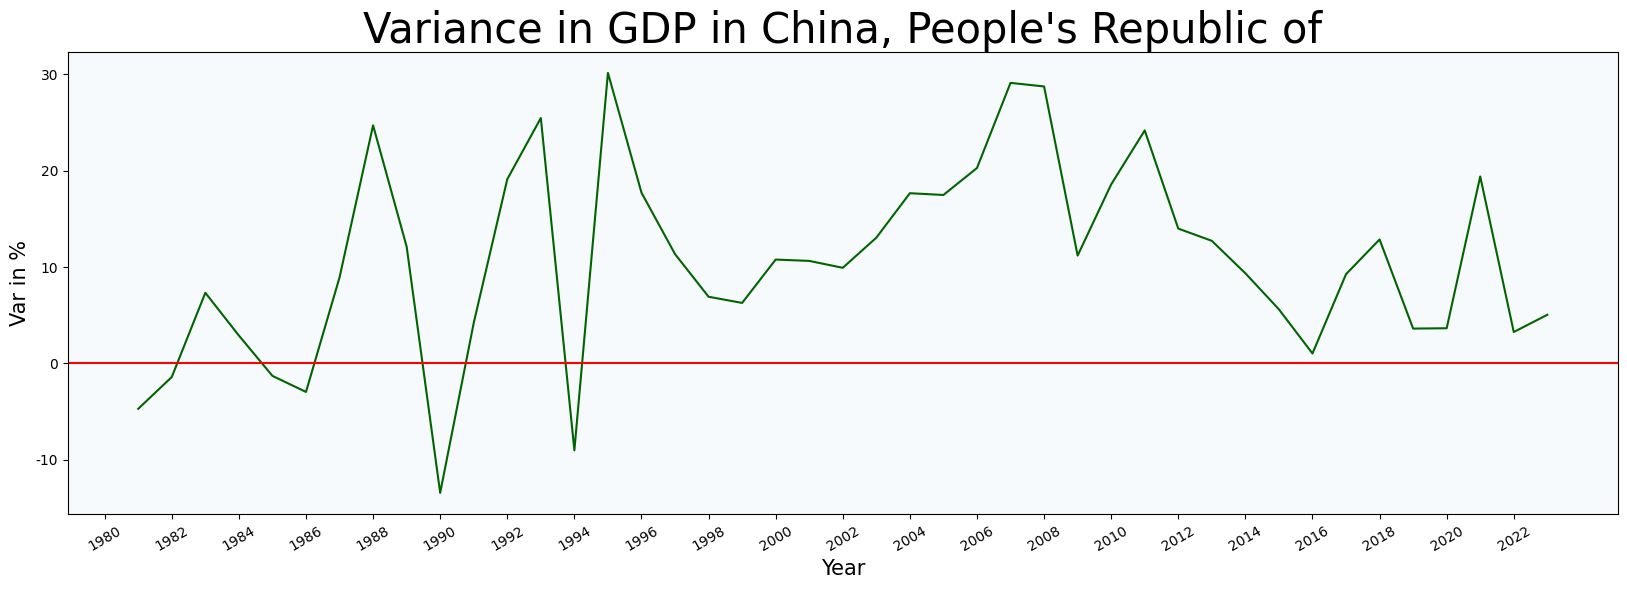

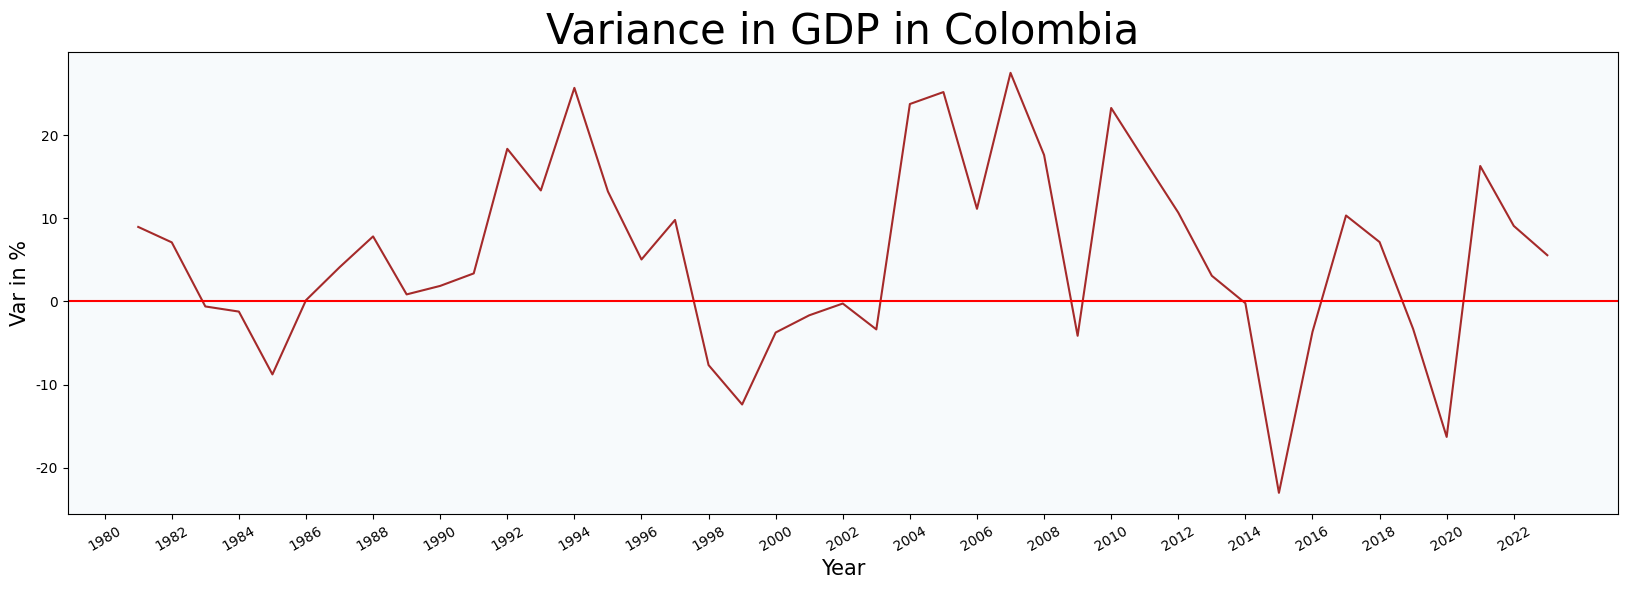

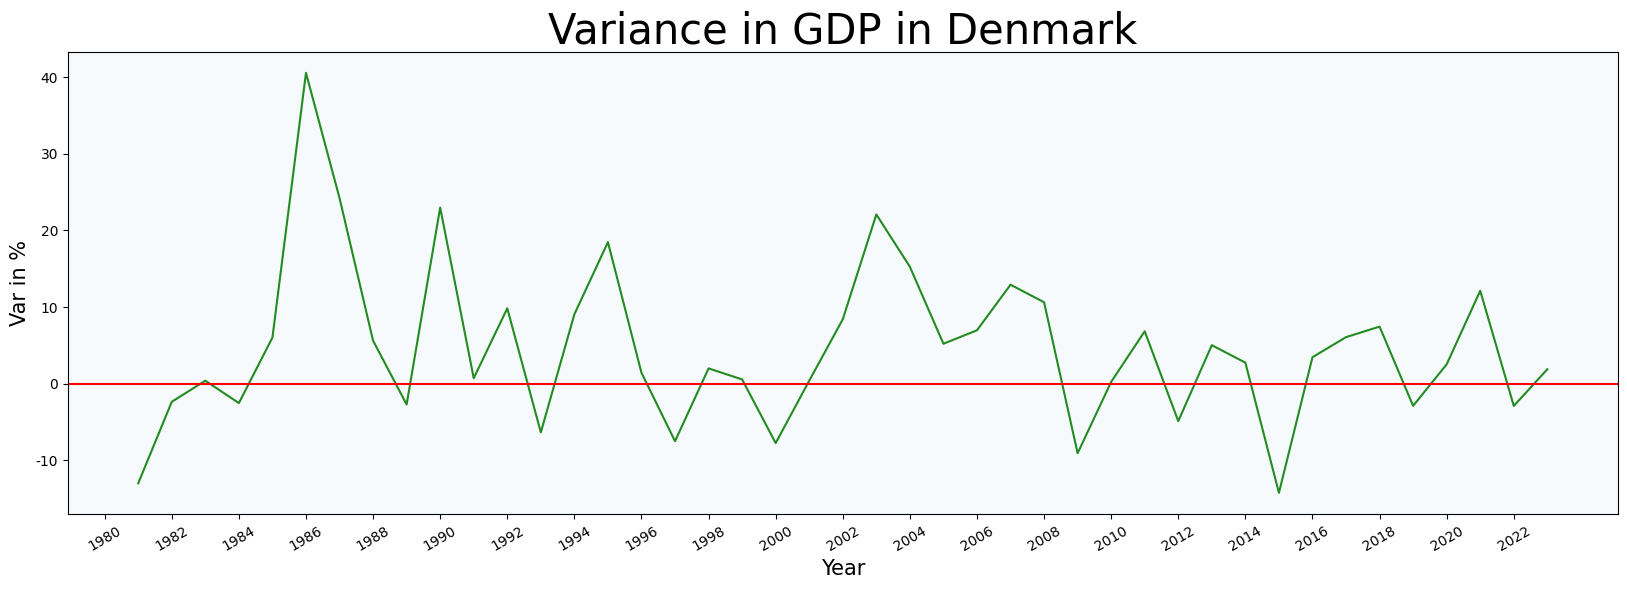

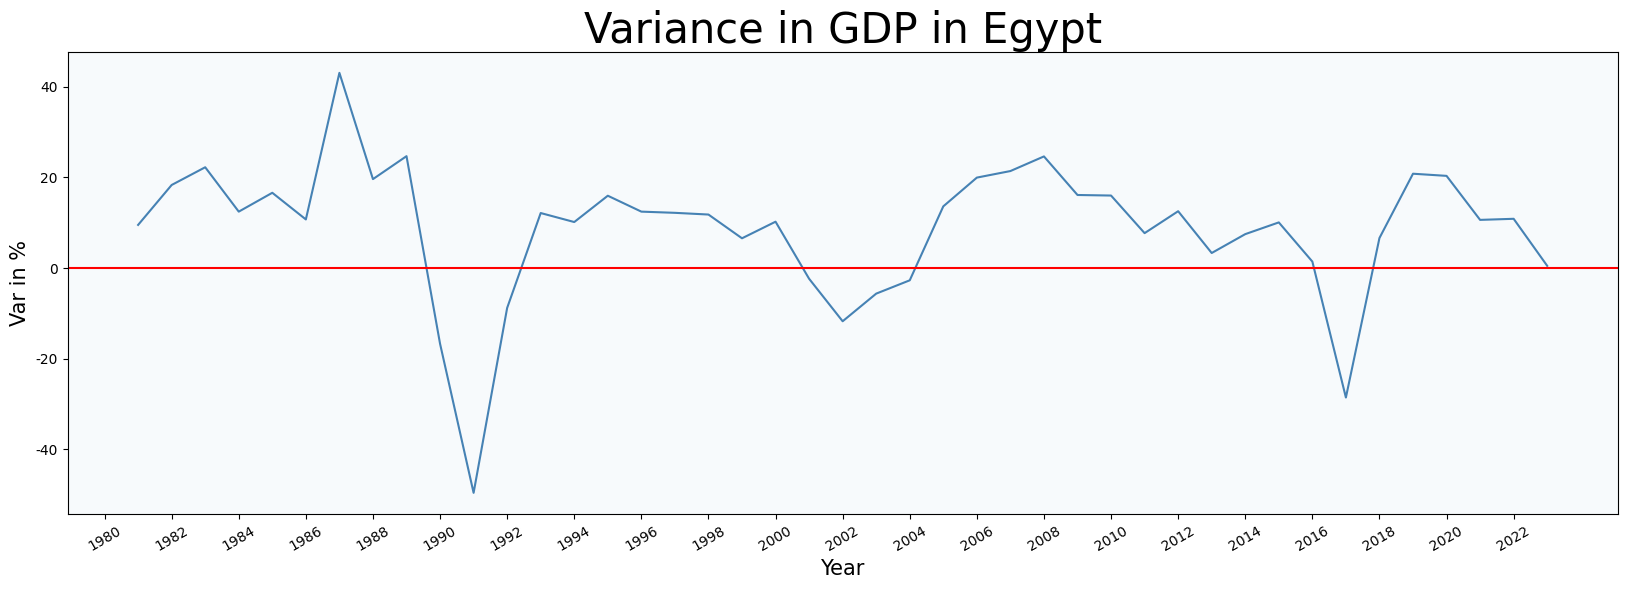

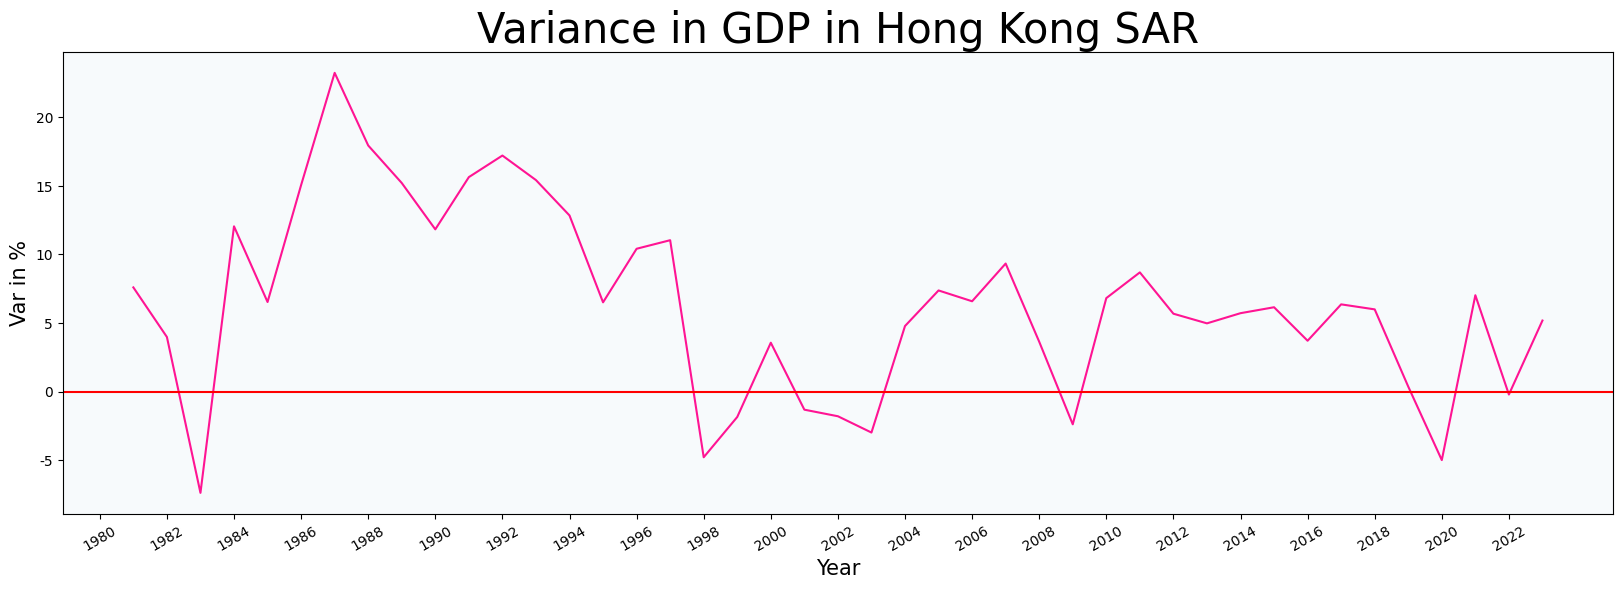

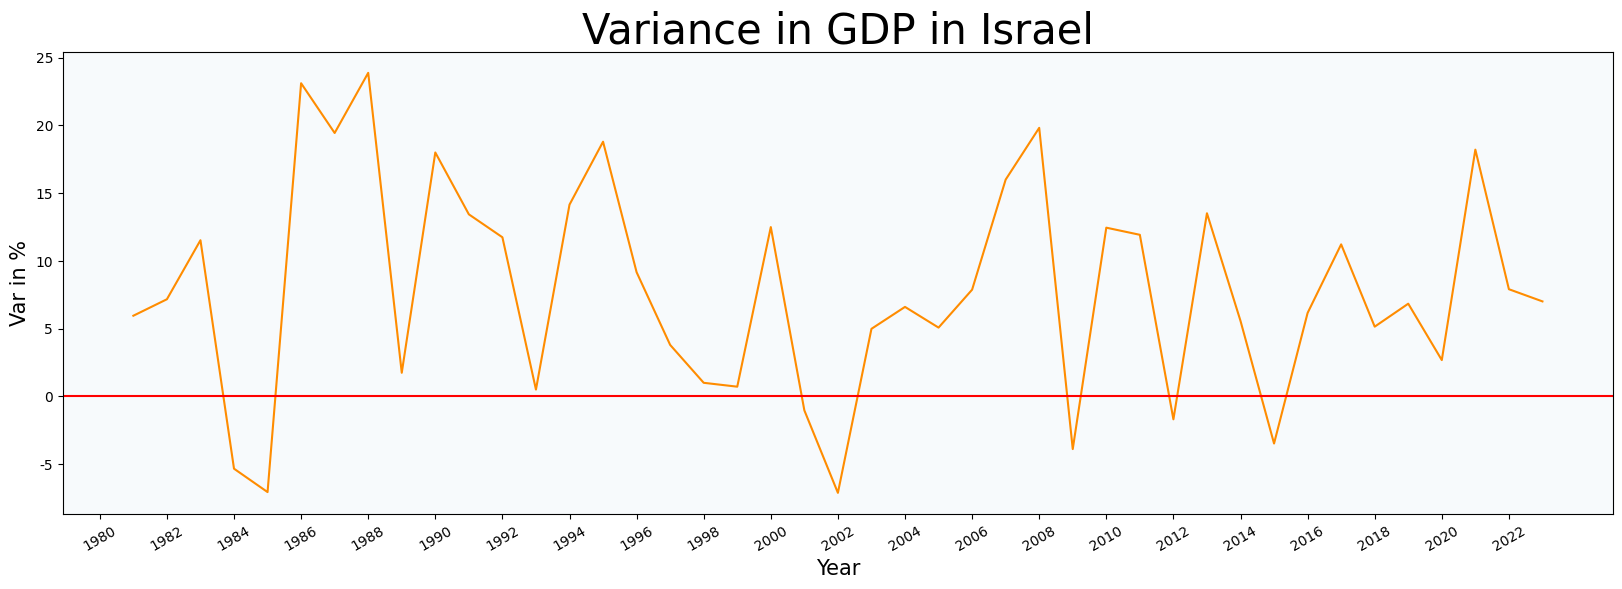

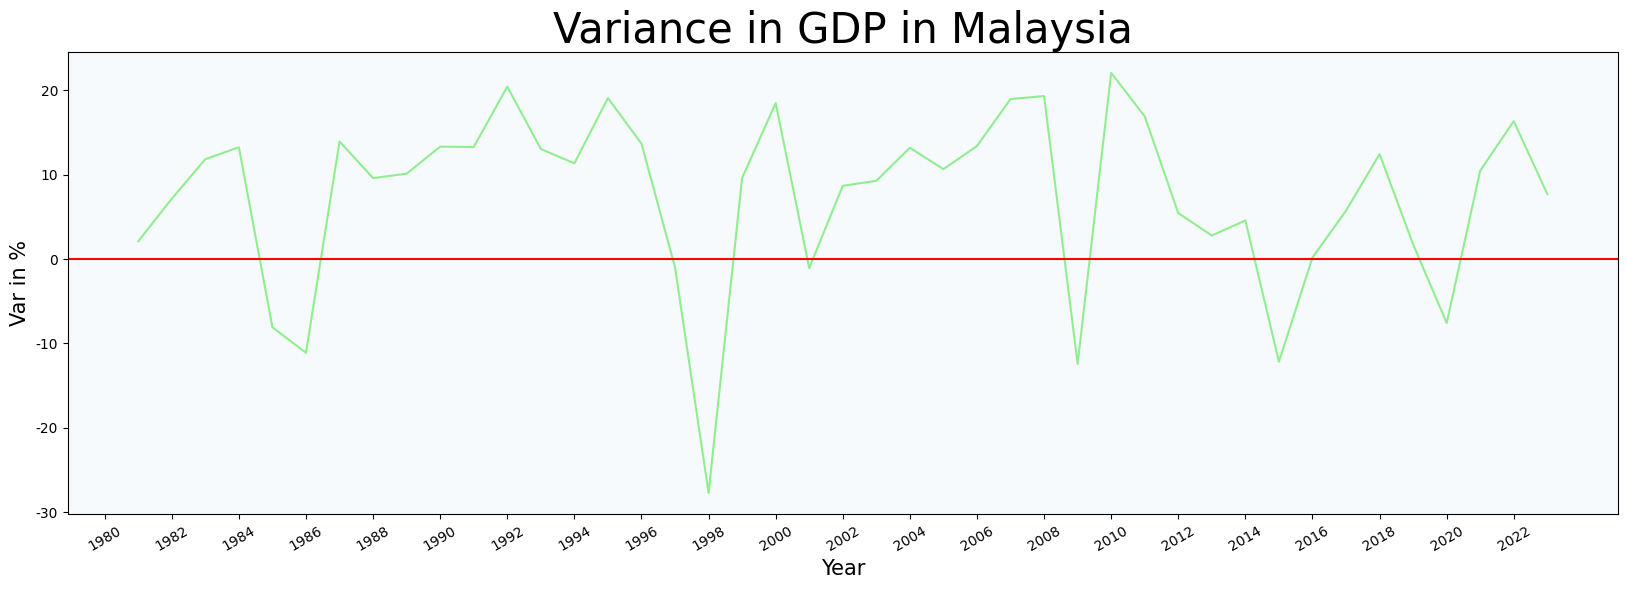

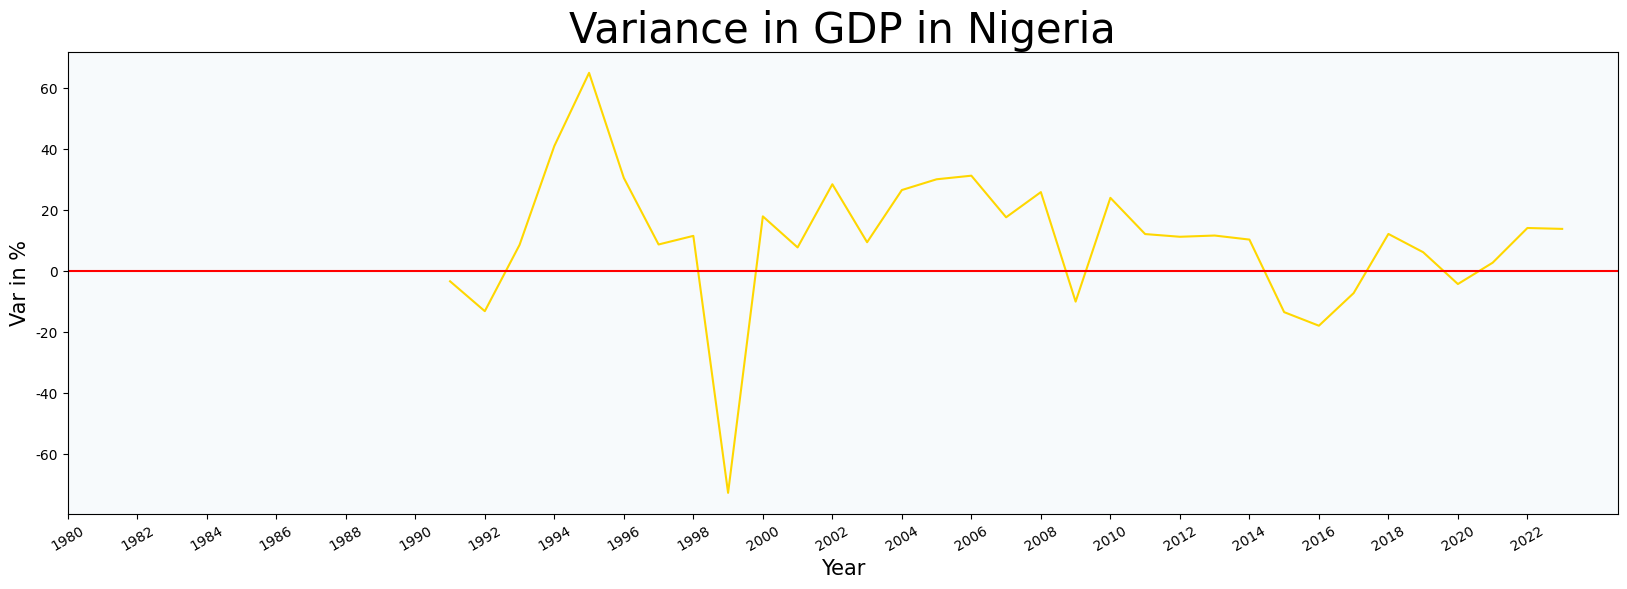

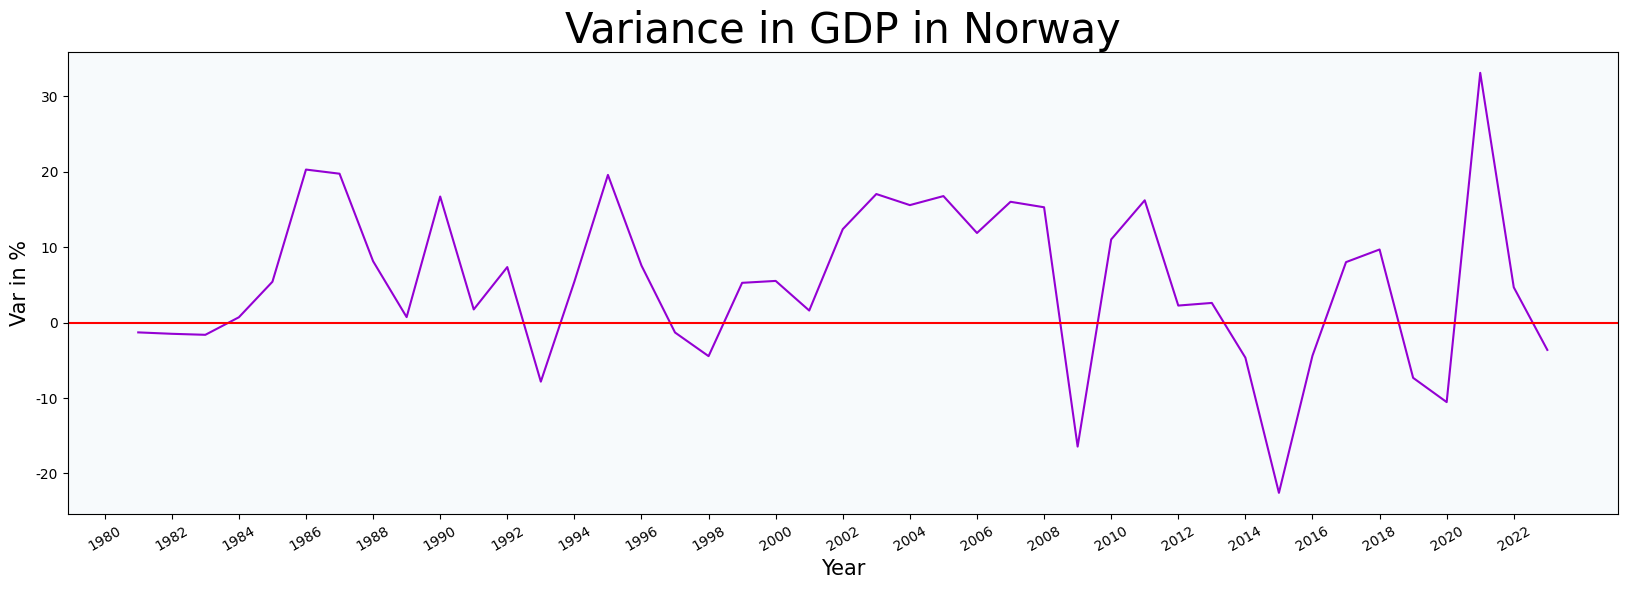

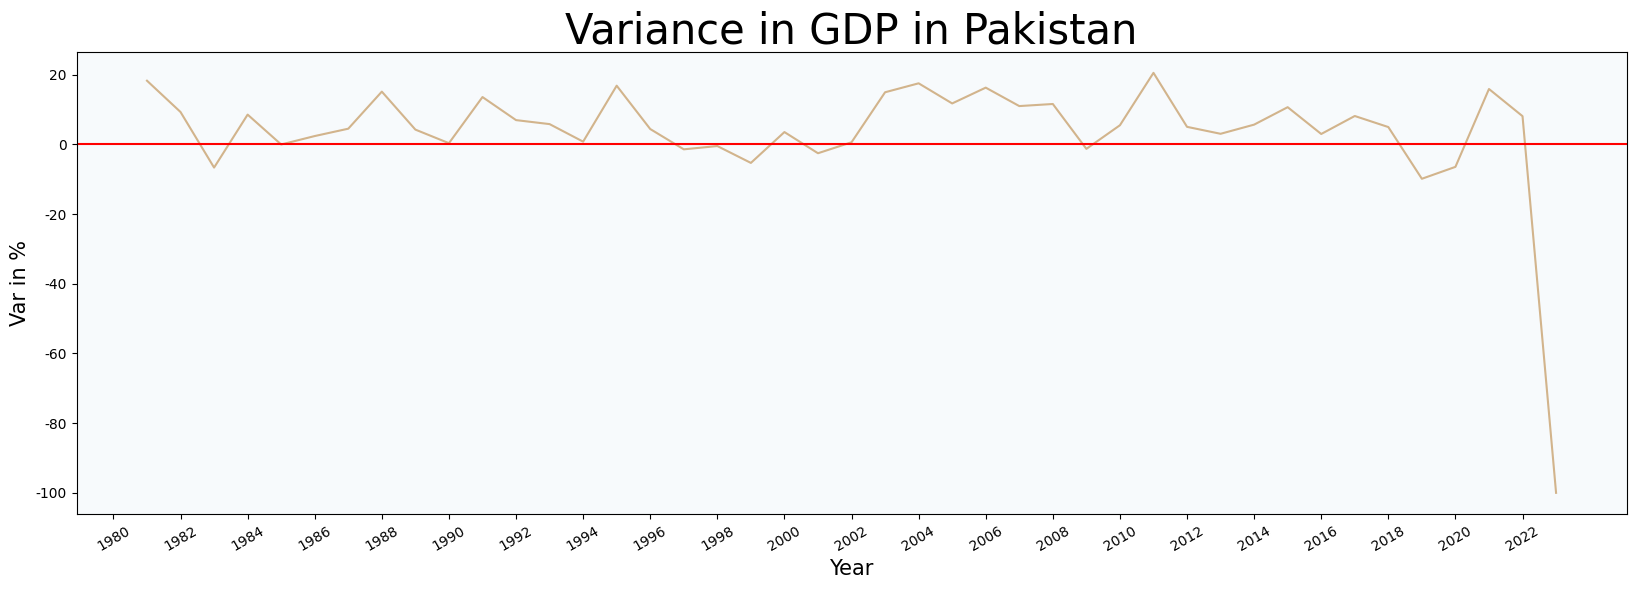

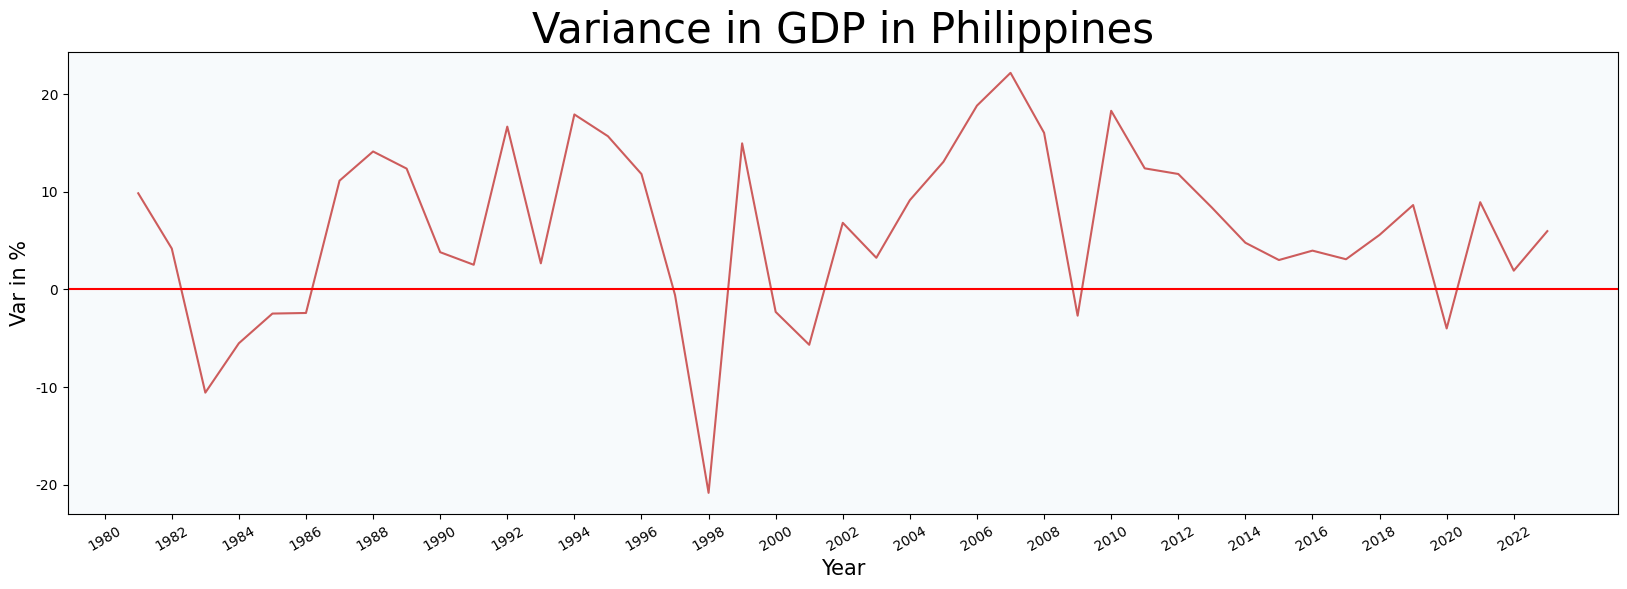

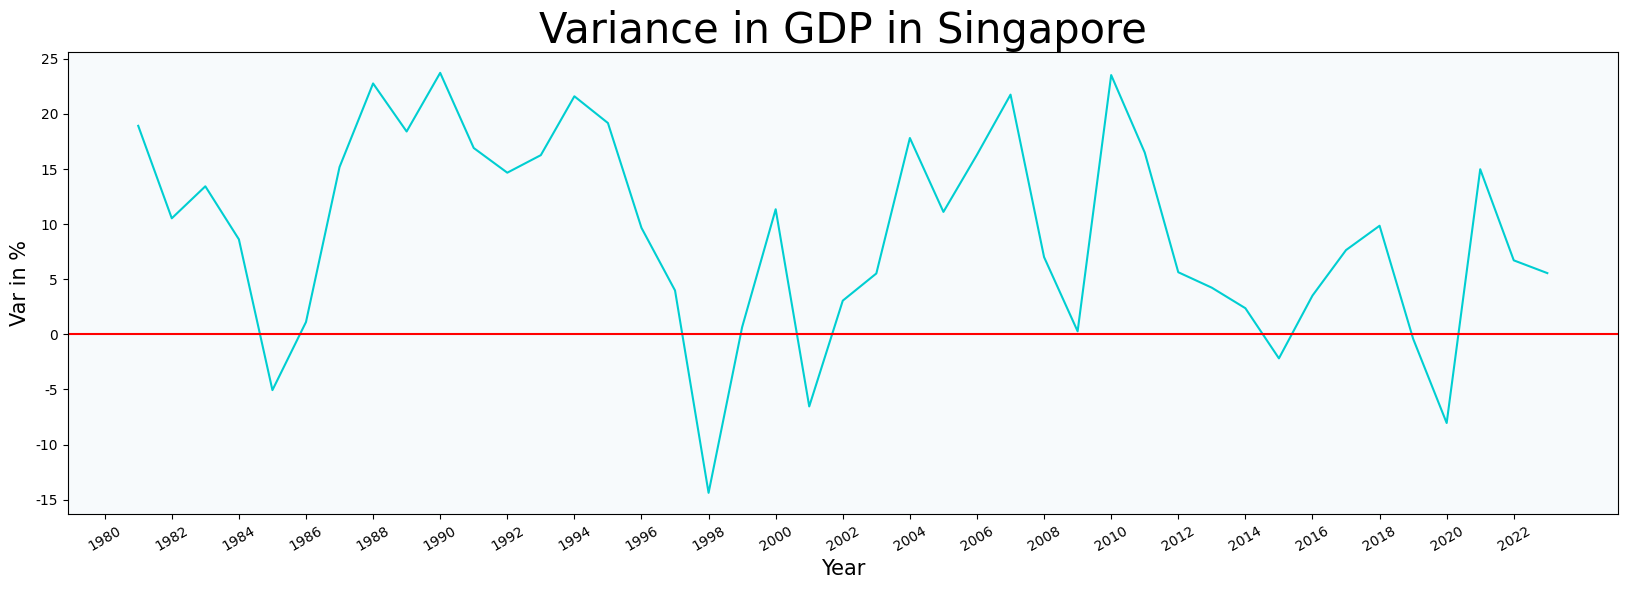

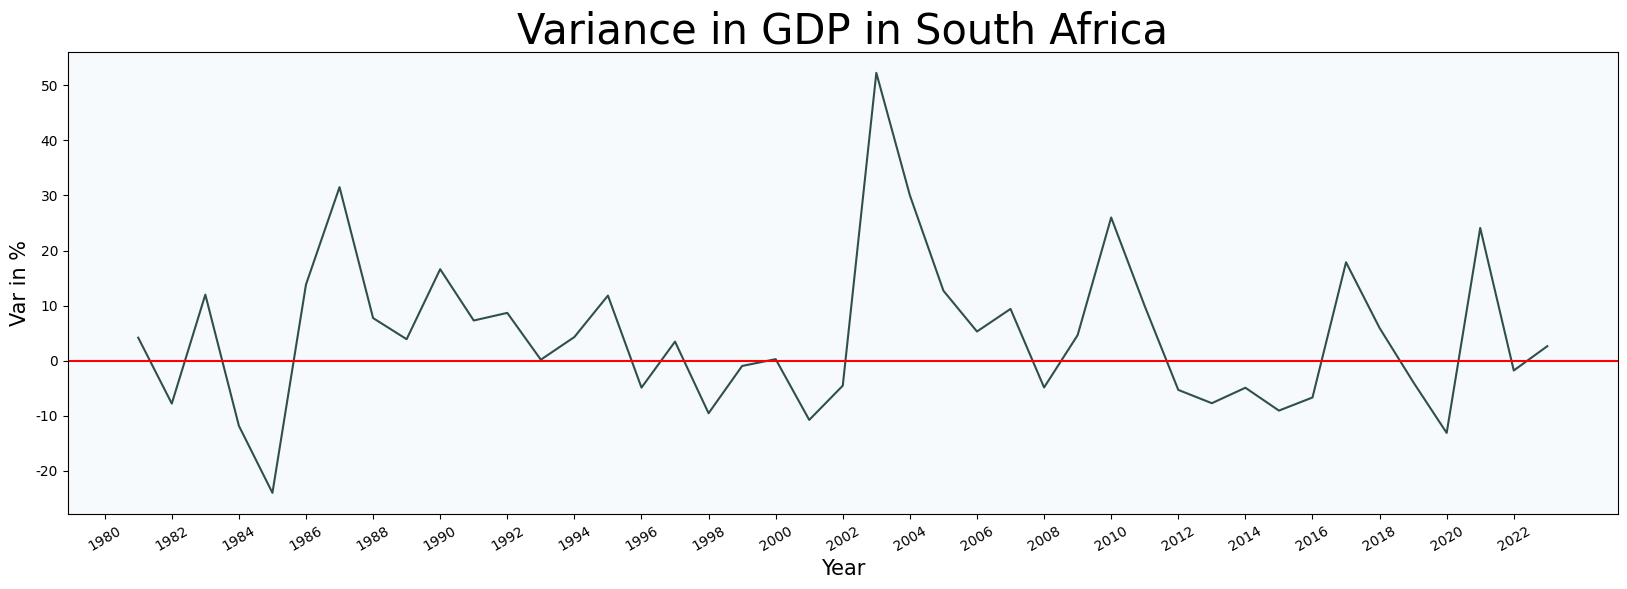

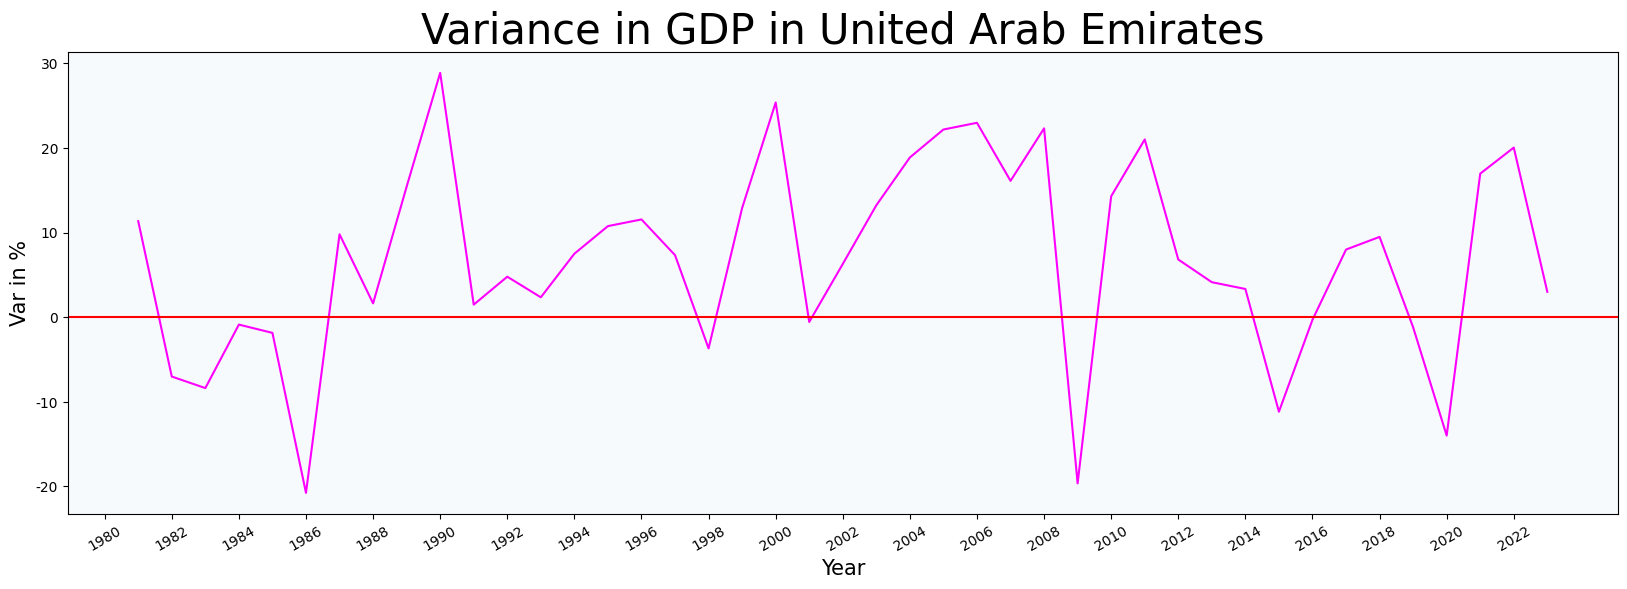

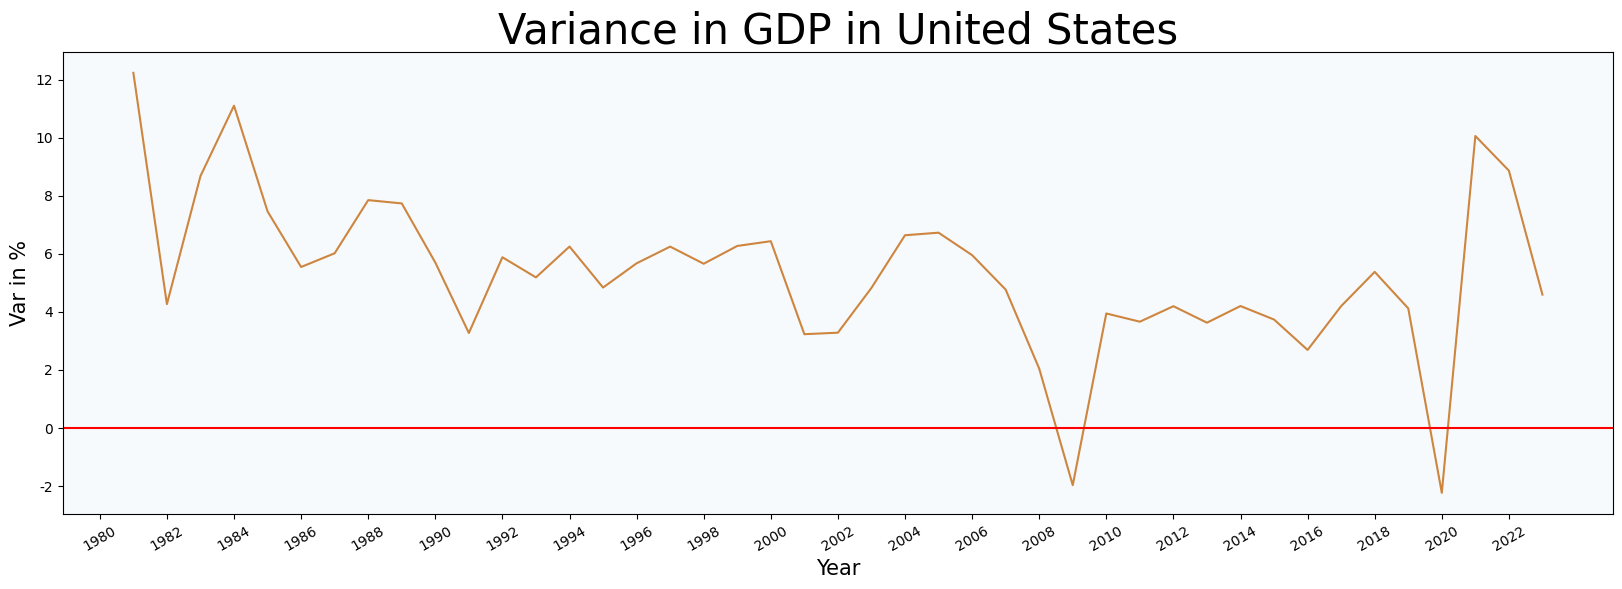

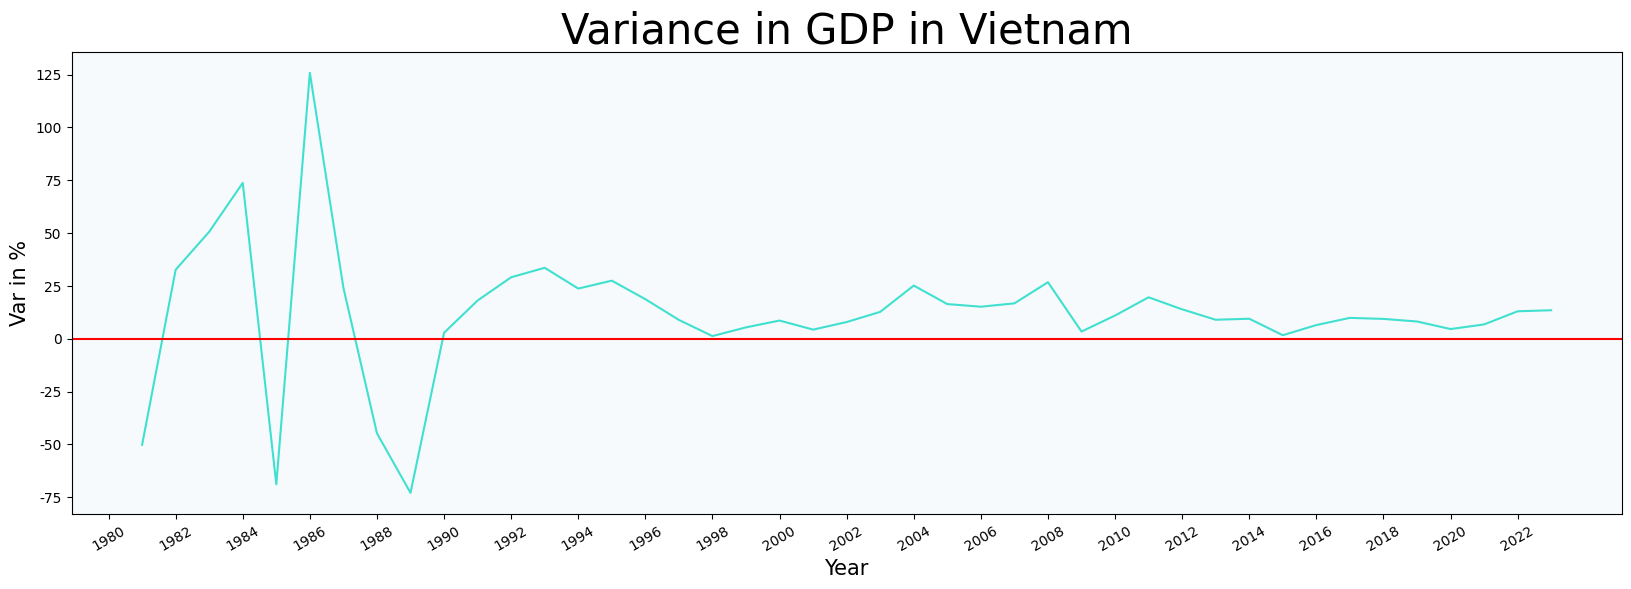

In [47]:
colorc = 0
for pais in lista2:
    graficos2(dfm, 'Year', 'Var1',
             columna_seleccion='Country', lista_seleccion=[pais,],
             ancho=20, alto=6,
             columna_y_title='Var in %',
             title='Variance in GDP in '+pais, print_legend='N',
             color_num=colorc,
             hor_line='Y',
             hor_line_val=0)
    colorc += 1
    if colorc == 20:
        colorc = 0

The range of variances, positive and negatives, is so high that in certain countries it is misguiding.

In [48]:
ptm = pd.pivot_table(dfm, index=['Year'], columns=['Country'], values=['Var1'], \
                   aggfunc = [np.sum], margins=False)
ptm_corr = ptm.corr()

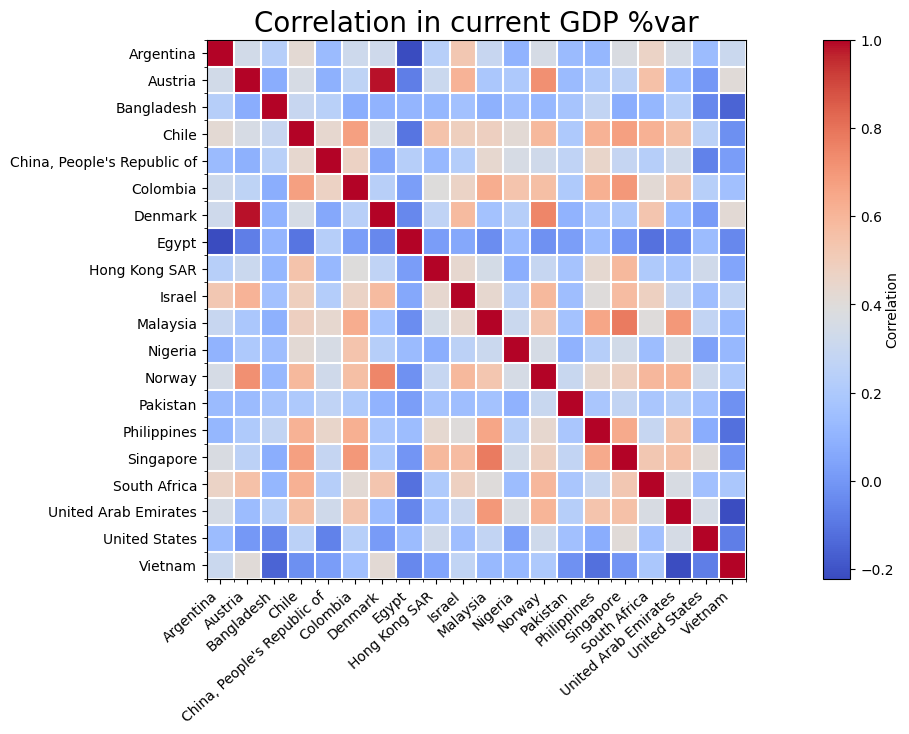

In [49]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Correlation in current GDP %var', fontsize=20)

# the heatmap and colorbar
im = ax.imshow(ptm_corr, cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation', rotation=90, va="bottom")

# adding chart features
ax.set_xticks(range(len(lista2)), labels=lista2)
ax.set_yticks(range(len(lista2)), labels=lista2)
# the white border
ax.set_xticks(np.arange(-.5, len(lista2)), minor=True)
ax.set_yticks(np.arange(-.5, len(lista2)), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=1.5)

for label in ax.get_xticklabels():
    label.set(rotation=42, ha='right')

plt.show()

## **Conclusion**

like this we can complete the process of eda using by repeating analysis and data visualisation.
By the above mappings we can see the correlation between countries and their mean growth in the gdp a country is producing in the upcoming years. We can also intrepret what countries may have a huge economic growth compared to others.